# Constant DOS

100%|███████████████████████████████████████| 700/700 [3:29:42<00:00, 17.98s/it]


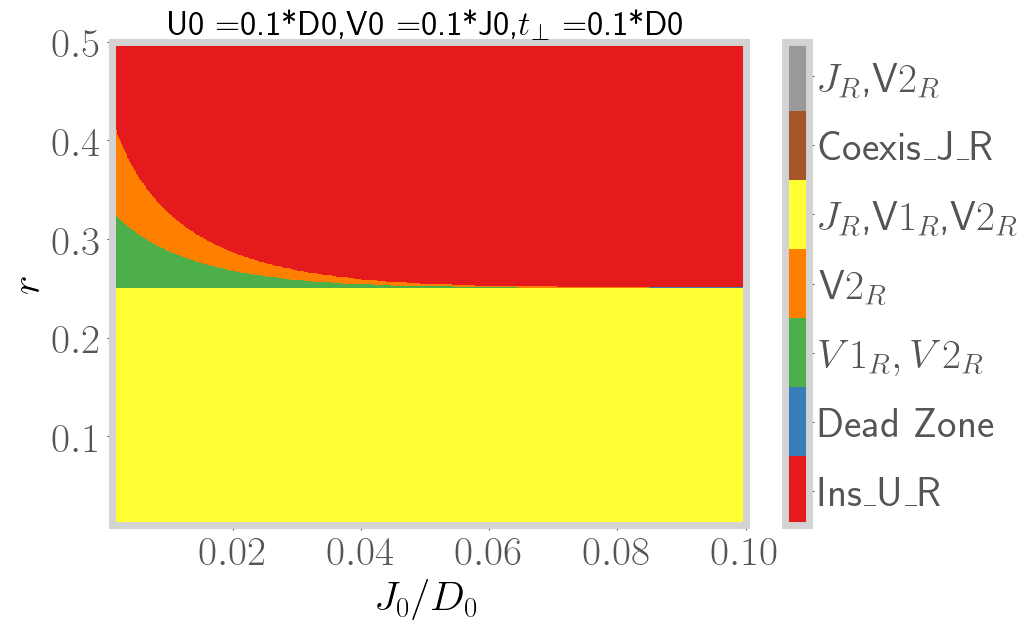

In [11]:

##### With two U_b,two J,two V when omega is fixed





import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.style.use('ggplot')
cols = [p['color'] for p in plt.rcParams['axes.prop_cycle']]
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{braket}\usepackage{nicefrac}')
plt.rcParams.update({'font.size': 30,
                     'figure.figsize': (11,7),
                     'axes.facecolor': 'white',
                     'axes.edgecolor': 'lightgray',
                     "figure.autolayout": 'True',
                     'axes.xmargin': 0.03,
                     'axes.ymargin': 0.05,
                     'axes.grid': False,
                     'axes.linewidth': 5,
                     'lines.markersize': 10,
                     'text.usetex': True,
                     'lines.linewidth': 8,
                     "legend.frameon": True,
                     "legend.framealpha": 0.7,
                     "legend.handletextpad": 1,
                     "legend.edgecolor": "gray",
                     "legend.handlelength": 1,
                     "legend.labelspacing": 0,
                     "legend.columnspacing": 1,
                     "legend.fontsize": 35,
                    })
linestyles = ["-", "--", ":"]






from time import sleep
import numpy as np
import matplotlib.pyplot as plt
import sys
from matplotlib import colors
from multiprocessing import Pool
from tqdm import tqdm


def RG_flow(J0,U0,D0,t,V10,V20,U_b,d):
    J = [J0]
    V1 = [V10]
    V2 = [V20]
    U = [U0]
    D = [D0]
    d_0_int = D[0]-(J[0]/4) - (U_b/4)
    d_0_int1 = d_0_int - (U[0]/2)
    d_0_int2  = d_0_int + (J[0]/4) + (U[0]/2)
    d_0_int3  = d_0_int + (J[0]/4)
    flag_J = True
    flag_V1 = True
    flag_V2 = True
    flag_U = True
    dens = []
    A1 = 0
    A2 = 0
    B1 = 0
    B2 = 0
    C1 = 0
    C2 = 0
    D1 = 0
    D2 = 0
    # print (J0,U_b,"---")
    while D[-1] > 0:
        d_0=D[0]/2 + D[-1]/2-(J[-1]/4)  - (U_b/4)
        
        A1 = 1/(d_0 - t) if (d_0 - t) * (d_0_int - t) > 0 else 0
        A2 = 1/(d_0 + t) if (d_0 + t) * (d_0_int + t) > 0 else 0
         
        B1 = 1/(d_0 - (U[-1]/2) - t) if (d_0 - (U[-1]/2) - t) * (d_0_int1 - t)  > 0 else 0
        B2 = 1/(d_0 - (U[-1]/2) + t) if (d_0 - (U[-1]/2) + t) * (d_0_int1 + t)  > 0 else 0
        
        C1 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) - t ) if (d_0 + (J[-1]/4) + (U[-1]/2) - t) * (d_0_int2 - t) > 0 else 0
        C2 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) + t ) if (d_0 + (J[-1]/4) + (U[-1]/2) + t) * (d_0_int2 + t) > 0 else 0
        
        D1 = 1/(d_0 + (J[-1]/4) - t ) if (d_0 + (J[-1]/4) - t) * (d_0_int3 - t) > 0 else 0
        D2 = 1/(d_0 + (J[-1]/4) + t ) if (d_0 + (J[-1]/4) + t) * (d_0_int3 + t) > 0 else 0
            
        delta_J = J[-1]*(J[-1] + 4*U_b)*(A1 + A2)*0.5*d
        
        if (J[-1] + delta_J) * J[-1] > 0 and flag_J:
            J.append(J[-1] + delta_J)
        else :
            flag_J =False
            J.append(0)
            
        delta_V_1_1 = ((3*J[-1]*V1[-1])/8)*(A2 + B2)*d 
        delta_V_1_2 = ((V1[-1] * U_b)/2)*(C1 + D1 + B2 + A2)*d
        delta_V_1 =  delta_V_1_1 + delta_V_1_2 
        
            
        if (V1[-1] + delta_V_1) * V1[-1] > 0 and flag_V1:
            V1.append(min(V1[-1] + delta_V_1,10**120))
        else :
            V1.append(0)
            flag_V1 = False
        #print(A2,B2,V1[-1])
        delta_V_2_1 = ((3*J[-1]*V2[-1])/8)*(A1 + B1)*d 
        delta_V_2_2 = ((V2[-1] * U_b)/2)*(C2 + D2 + B1 + A1)*d
        delta_V_2 =  delta_V_2_1 + delta_V_2_2 
        
        if (V2[-1] + delta_V_2) * V2[-1] > 0 and flag_V2:
            V2.append(min(V2[-1] + delta_V_2,10**120))
        else :
            V2.append(0)
            flag_V2 = False
            
            
        delta_U = (4*(V1[-1]**2 + V2[-1]**2)*(C1 + C2 - B1 - B2)+ J[-1]**2*(A1 + A2))* d
        
    
        if (U[-1] + delta_U) * U[-1] > 0 and flag_U:
            U.append(U[-1] + delta_U)
        else :
            U.append(0)
            flag_U = False
        D.append(D[-1]-d)
        
    return V1, V2, J, U, D
    
def RG(y,r,U0,D0,t,V_by_J,d=0.01):
    W = []
    
    for r_i in tqdm(r):
        W.append([])
        for J0 in y :
            V10 = J0*V_by_J
            V20 = J0*V_by_J
            U_b = r_i * J0
            V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
            
            if J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 > 0.3:
                flag = 0
            elif J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 < 0.3:
                #print (J0, V10, V20, U0, U_b, J[-1]/J0, V1[-1]/V10, V2[-1]/V20, U[-1]/U0)
                flag = 1
            elif J[-1]/J0 < 1  and V1[-1]/V10 > 1  and V2[-1]/V20 > 1:
                flag = 2
            elif J[-1]/J0 < 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 3
            elif J[-1]/J0 > 1  and V1[-1]/V10 > 1 and V2[-1]/V20 > 1:
                flag = 4
            elif J[-1]/J0 > 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1:
                flag = 5
                # print (J[-1]/J0, V[-1]/V0)
                # print (dens)
            elif J[-1]/J0 > 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 6
            W[-1].append(flag)
            
    
    
    
    cmap = plt.cm.Set1
    norm = colors.BoundaryNorm(np.arange(-0.5, 7, 1), cmap.N)
    im1 = plt.imshow(W, origin='lower', cmap=cmap, norm=norm, aspect = "auto",extent=(min(y)/D0, max(y)/D0, min(abs(r)), max(abs(r))),interpolation="None")
    colorbar = plt.colorbar(ticks=np.linspace(0, 6, 7))
    colorbar.set_ticklabels(['Ins_U_R', 'Dead Zone','$V1_R,V2_R$','V$2_R$','$J_{R}$,V$1_{R}$,V$2_{R}$','Coexis_J_R', '$J_{R}$,V$2_{R}$'])
    plt.ylabel('$r$')
    plt.xlabel('$J_{0}/D_0$')
    plt.title('U0 ={U0}*D0,V0 ={V_by_J}*J0,$t_\perp$ ={t}*D0'.format(U0= U0/D0,V_by_J =V_by_J,t =t/D0),fontsize='small')
    #plt.yscale('log')
    plt.savefig("U_0*D_0 ={U0},V_0 ={V_by_J}*J0,t*D0 ={t}.pdf".format(U0= U0,V_by_J =V_by_J,t =t), bbox_inches='tight')
    plt.savefig("U_0*D_0 ={U0},V_0 ={V_by_J}*J0,t*D0 ={t}.png".format(U0= U0,V_by_J =V_by_J,t =t), bbox_inches='tight')
    plt.show()

D0 = 100
U0 = 0.1 * D0
#y = 10**np.linspace(-1,0, 40) * D0
y = np.linspace(0.001, 0.1, 700) * D0
#print(y)
#x = np.linspace(0.001, 2, 10) * D0
V_by_J = 0.1
#r = -10**np.linspace(-1,1, 40) 
r = -np.linspace(0.01,0.5,700) 
t = 0.1 * D0
RG(y,r,U0,D0,t,V_by_J,d=0.05)

100%|███████████████████████████████████████| 700/700 [3:38:49<00:00, 18.76s/it]


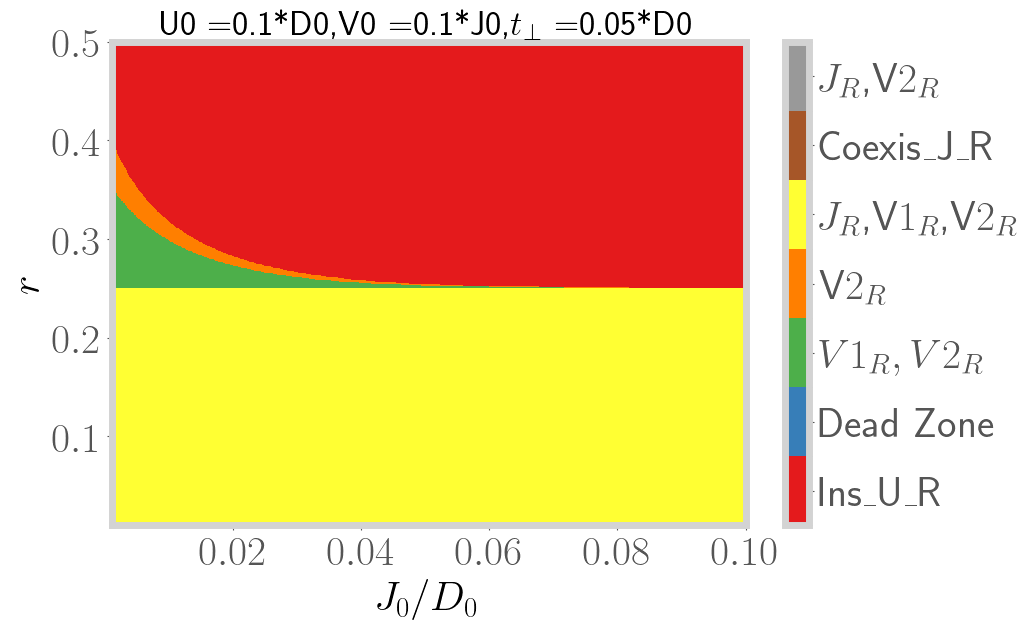

In [12]:

##### With two U_b,two J,two V when omega is fixed





import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.style.use('ggplot')
cols = [p['color'] for p in plt.rcParams['axes.prop_cycle']]
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{braket}\usepackage{nicefrac}')
plt.rcParams.update({'font.size': 30,
                     'figure.figsize': (11,7),
                     'axes.facecolor': 'white',
                     'axes.edgecolor': 'lightgray',
                     "figure.autolayout": 'True',
                     'axes.xmargin': 0.03,
                     'axes.ymargin': 0.05,
                     'axes.grid': False,
                     'axes.linewidth': 5,
                     'lines.markersize': 10,
                     'text.usetex': True,
                     'lines.linewidth': 8,
                     "legend.frameon": True,
                     "legend.framealpha": 0.7,
                     "legend.handletextpad": 1,
                     "legend.edgecolor": "gray",
                     "legend.handlelength": 1,
                     "legend.labelspacing": 0,
                     "legend.columnspacing": 1,
                     "legend.fontsize": 35,
                    })
linestyles = ["-", "--", ":"]






from time import sleep
import numpy as np
import matplotlib.pyplot as plt
import sys
from matplotlib import colors
from multiprocessing import Pool
from tqdm import tqdm


def RG_flow(J0,U0,D0,t,V10,V20,U_b,d):
    J = [J0]
    V1 = [V10]
    V2 = [V20]
    U = [U0]
    D = [D0]
    d_0_int = D[0]-(J[0]/4) - (U_b/4)
    d_0_int1 = d_0_int - (U[0]/2)
    d_0_int2  = d_0_int + (J[0]/4) + (U[0]/2)
    d_0_int3  = d_0_int + (J[0]/4)
    flag_J = True
    flag_V1 = True
    flag_V2 = True
    flag_U = True
    dens = []
    A1 = 0
    A2 = 0
    B1 = 0
    B2 = 0
    C1 = 0
    C2 = 0
    D1 = 0
    D2 = 0
    # print (J0,U_b,"---")
    while D[-1] > 0:
        d_0=D[0]/2 + D[-1]/2-(J[-1]/4)  - (U_b/4)
        
        A1 = 1/(d_0 - t) if (d_0 - t) * (d_0_int - t) > 0 else 0
        A2 = 1/(d_0 + t) if (d_0 + t) * (d_0_int + t) > 0 else 0
         
        B1 = 1/(d_0 - (U[-1]/2) - t) if (d_0 - (U[-1]/2) - t) * (d_0_int1 - t)  > 0 else 0
        B2 = 1/(d_0 - (U[-1]/2) + t) if (d_0 - (U[-1]/2) + t) * (d_0_int1 + t)  > 0 else 0
        
        C1 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) - t ) if (d_0 + (J[-1]/4) + (U[-1]/2) - t) * (d_0_int2 - t) > 0 else 0
        C2 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) + t ) if (d_0 + (J[-1]/4) + (U[-1]/2) + t) * (d_0_int2 + t) > 0 else 0
        
        D1 = 1/(d_0 + (J[-1]/4) - t ) if (d_0 + (J[-1]/4) - t) * (d_0_int3 - t) > 0 else 0
        D2 = 1/(d_0 + (J[-1]/4) + t ) if (d_0 + (J[-1]/4) + t) * (d_0_int3 + t) > 0 else 0
            
        delta_J = J[-1]*(J[-1] + 4*U_b)*(A1 + A2)*0.5*d
        
        if (J[-1] + delta_J) * J[-1] > 0 and flag_J:
            J.append(J[-1] + delta_J)
        else :
            flag_J =False
            J.append(0)
            
        delta_V_1_1 = ((3*J[-1]*V1[-1])/8)*(A2 + B2)*d 
        delta_V_1_2 = ((V1[-1] * U_b)/2)*(C1 + D1 + B2 + A2)*d
        delta_V_1 =  delta_V_1_1 + delta_V_1_2 
        
            
        if (V1[-1] + delta_V_1) * V1[-1] > 0 and flag_V1:
            V1.append(min(V1[-1] + delta_V_1,10**120))
        else :
            V1.append(0)
            flag_V1 = False
        #print(A2,B2,V1[-1])
        delta_V_2_1 = ((3*J[-1]*V2[-1])/8)*(A1 + B1)*d 
        delta_V_2_2 = ((V2[-1] * U_b)/2)*(C2 + D2 + B1 + A1)*d
        delta_V_2 =  delta_V_2_1 + delta_V_2_2 
        
        if (V2[-1] + delta_V_2) * V2[-1] > 0 and flag_V2:
            V2.append(min(V2[-1] + delta_V_2,10**120))
        else :
            V2.append(0)
            flag_V2 = False
            
            
        delta_U = (4*(V1[-1]**2 + V2[-1]**2)*(C1 + C2 - B1 - B2)+ J[-1]**2*(A1 + A2))* d
        
    
        if (U[-1] + delta_U) * U[-1] > 0 and flag_U:
            U.append(U[-1] + delta_U)
        else :
            U.append(0)
            flag_U = False
        D.append(D[-1]-d)
        
    return V1, V2, J, U, D
    
def RG(y,r,U0,D0,t,V_by_J,d=0.01):
    W = []
    
    for r_i in tqdm(r):
        W.append([])
        for J0 in y :
            V10 = J0*V_by_J
            V20 = J0*V_by_J
            U_b = r_i * J0
            V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
            
            if J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 > 0.3:
                flag = 0
            elif J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 < 0.3:
                #print (J0, V10, V20, U0, U_b, J[-1]/J0, V1[-1]/V10, V2[-1]/V20, U[-1]/U0)
                flag = 1
            elif J[-1]/J0 < 1  and V1[-1]/V10 > 1  and V2[-1]/V20 > 1:
                flag = 2
            elif J[-1]/J0 < 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 3
            elif J[-1]/J0 > 1  and V1[-1]/V10 > 1 and V2[-1]/V20 > 1:
                flag = 4
            elif J[-1]/J0 > 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1:
                flag = 5
                # print (J[-1]/J0, V[-1]/V0)
                # print (dens)
            elif J[-1]/J0 > 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 6
            W[-1].append(flag)
            
    
    
    
    cmap = plt.cm.Set1
    norm = colors.BoundaryNorm(np.arange(-0.5, 7, 1), cmap.N)
    im1 = plt.imshow(W, origin='lower', cmap=cmap, norm=norm, aspect = "auto",extent=(min(y)/D0, max(y)/D0, min(abs(r)), max(abs(r))),interpolation="None")
    colorbar = plt.colorbar(ticks=np.linspace(0, 6, 7))
    colorbar.set_ticklabels(['Ins_U_R', 'Dead Zone','$V1_R,V2_R$','V$2_R$','$J_{R}$,V$1_{R}$,V$2_{R}$','Coexis_J_R', '$J_{R}$,V$2_{R}$'])
    plt.ylabel('$r$')
    plt.xlabel('$J_{0}/D_0$')
    plt.title('U0 ={U0}*D0,V0 ={V_by_J}*J0,$t_\perp$ ={t}*D0'.format(U0= U0/D0,V_by_J =V_by_J,t =t/D0),fontsize='small')
    #plt.yscale('log')
    plt.savefig("U_0*D_0 ={U0},V_0 ={V_by_J}*J0,t*D0 ={t}.pdf".format(U0= U0,V_by_J =V_by_J,t =t), bbox_inches='tight')
    plt.savefig("U_0*D_0 ={U0},V_0 ={V_by_J}*J0,t*D0 ={t}.png".format(U0= U0,V_by_J =V_by_J,t =t), bbox_inches='tight')
    plt.show()

D0 = 100
U0 = 0.1 * D0
#y = 10**np.linspace(-1,0, 400) * D0
y = np.linspace(0.001, 0.1, 700) * D0
#print(y)
#x = np.linspace(0.001, 2, 10) * D0
V_by_J = 0.1
#r = -10**np.linspace(-1,1, 40) 
r = -np.linspace(0.01,0.5,700) 
t = 0.05 * D0
RG(y,r,U0,D0,t,V_by_J,d=0.05)

100%|███████████████████████████████████████| 700/700 [3:33:49<00:00, 18.33s/it]


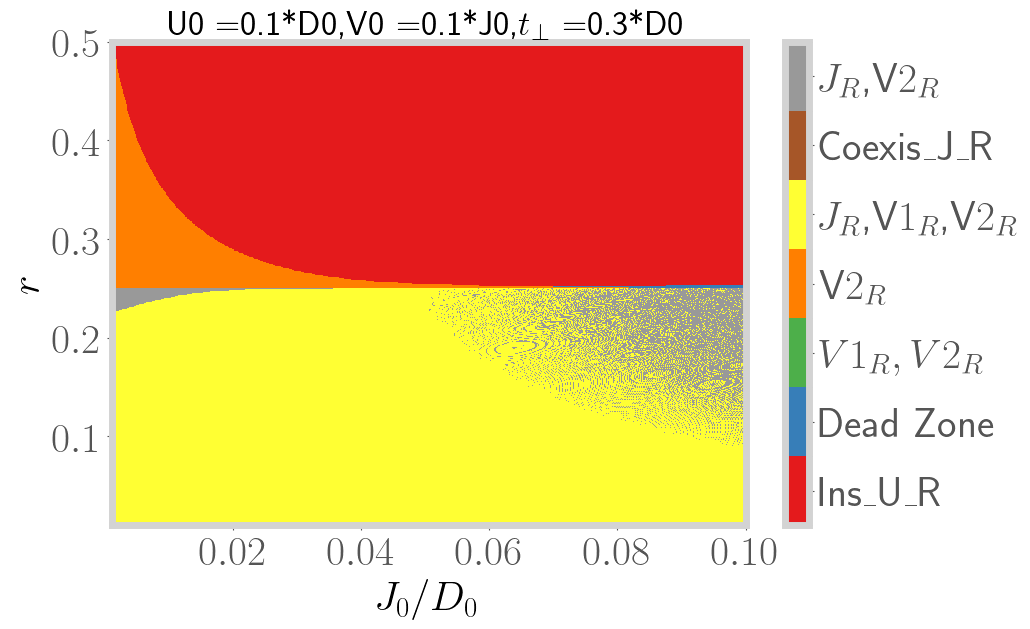

In [13]:

##### With two U_b,two J,two V when omega is fixed





import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.style.use('ggplot')
cols = [p['color'] for p in plt.rcParams['axes.prop_cycle']]
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{braket}\usepackage{nicefrac}')
plt.rcParams.update({'font.size': 30,
                     'figure.figsize': (11,7),
                     'axes.facecolor': 'white',
                     'axes.edgecolor': 'lightgray',
                     "figure.autolayout": 'True',
                     'axes.xmargin': 0.03,
                     'axes.ymargin': 0.05,
                     'axes.grid': False,
                     'axes.linewidth': 5,
                     'lines.markersize': 10,
                     'text.usetex': True,
                     'lines.linewidth': 8,
                     "legend.frameon": True,
                     "legend.framealpha": 0.7,
                     "legend.handletextpad": 1,
                     "legend.edgecolor": "gray",
                     "legend.handlelength": 1,
                     "legend.labelspacing": 0,
                     "legend.columnspacing": 1,
                     "legend.fontsize": 35,
                    })
linestyles = ["-", "--", ":"]






from time import sleep
import numpy as np
import matplotlib.pyplot as plt
import sys
from matplotlib import colors
from multiprocessing import Pool
from tqdm import tqdm


def RG_flow(J0,U0,D0,t,V10,V20,U_b,d):
    J = [J0]
    V1 = [V10]
    V2 = [V20]
    U = [U0]
    D = [D0]
    d_0_int = D[0]-(J[0]/4) - (U_b/4)
    d_0_int1 = d_0_int - (U[0]/2)
    d_0_int2  = d_0_int + (J[0]/4) + (U[0]/2)
    d_0_int3  = d_0_int + (J[0]/4)
    flag_J = True
    flag_V1 = True
    flag_V2 = True
    flag_U = True
    dens = []
    A1 = 0
    A2 = 0
    B1 = 0
    B2 = 0
    C1 = 0
    C2 = 0
    D1 = 0
    D2 = 0
    # print (J0,U_b,"---")
    while D[-1] > 0:
        d_0=D[0]/2 + D[-1]/2-(J[-1]/4)  - (U_b/4)
        
        A1 = 1/(d_0 - t) if (d_0 - t) * (d_0_int - t) > 0 else 0
        A2 = 1/(d_0 + t) if (d_0 + t) * (d_0_int + t) > 0 else 0
         
        B1 = 1/(d_0 - (U[-1]/2) - t) if (d_0 - (U[-1]/2) - t) * (d_0_int1 - t)  > 0 else 0
        B2 = 1/(d_0 - (U[-1]/2) + t) if (d_0 - (U[-1]/2) + t) * (d_0_int1 + t)  > 0 else 0
        
        C1 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) - t ) if (d_0 + (J[-1]/4) + (U[-1]/2) - t) * (d_0_int2 - t) > 0 else 0
        C2 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) + t ) if (d_0 + (J[-1]/4) + (U[-1]/2) + t) * (d_0_int2 + t) > 0 else 0
        
        D1 = 1/(d_0 + (J[-1]/4) - t ) if (d_0 + (J[-1]/4) - t) * (d_0_int3 - t) > 0 else 0
        D2 = 1/(d_0 + (J[-1]/4) + t ) if (d_0 + (J[-1]/4) + t) * (d_0_int3 + t) > 0 else 0
            
        delta_J = J[-1]*(J[-1] + 4*U_b)*(A1 + A2)*0.5*d
        
        if (J[-1] + delta_J) * J[-1] > 0 and flag_J:
            J.append(J[-1] + delta_J)
        else :
            flag_J =False
            J.append(0)
            
        delta_V_1_1 = ((3*J[-1]*V1[-1])/8)*(A2 + B2)*d 
        delta_V_1_2 = ((V1[-1] * U_b)/2)*(C1 + D1 + B2 + A2)*d
        delta_V_1 =  delta_V_1_1 + delta_V_1_2 
        
            
        if (V1[-1] + delta_V_1) * V1[-1] > 0 and flag_V1:
            V1.append(min(V1[-1] + delta_V_1,10**120))
        else :
            V1.append(0)
            flag_V1 = False
        #print(A2,B2,V1[-1])
        delta_V_2_1 = ((3*J[-1]*V2[-1])/8)*(A1 + B1)*d 
        delta_V_2_2 = ((V2[-1] * U_b)/2)*(C2 + D2 + B1 + A1)*d
        delta_V_2 =  delta_V_2_1 + delta_V_2_2 
        
        if (V2[-1] + delta_V_2) * V2[-1] > 0 and flag_V2:
            V2.append(min(V2[-1] + delta_V_2,10**120))
        else :
            V2.append(0)
            flag_V2 = False
            
            
        delta_U = (4*(V1[-1]**2 + V2[-1]**2)*(C1 + C2 - B1 - B2)+ J[-1]**2*(A1 + A2))* d
        
    
        if (U[-1] + delta_U) * U[-1] > 0 and flag_U:
            U.append(U[-1] + delta_U)
        else :
            U.append(0)
            flag_U = False
        D.append(D[-1]-d)
        
    return V1, V2, J, U, D
    
def RG(y,r,U0,D0,t,V_by_J,d=0.01):
    W = []
    
    for r_i in tqdm(r):
        W.append([])
        for J0 in y :
            V10 = J0*V_by_J
            V20 = J0*V_by_J
            U_b = r_i * J0
            V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
            
            if J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 > 0.3:
                flag = 0
            elif J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 < 0.3:
                #print (J0, V10, V20, U0, U_b, J[-1]/J0, V1[-1]/V10, V2[-1]/V20, U[-1]/U0)
                flag = 1
            elif J[-1]/J0 < 1  and V1[-1]/V10 > 1  and V2[-1]/V20 > 1:
                flag = 2
            elif J[-1]/J0 < 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 3
            elif J[-1]/J0 > 1  and V1[-1]/V10 > 1 and V2[-1]/V20 > 1:
                flag = 4
            elif J[-1]/J0 > 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1:
                flag = 5
                # print (J[-1]/J0, V[-1]/V0)
                # print (dens)
            elif J[-1]/J0 > 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 6
            W[-1].append(flag)
            
    
    
    
    cmap = plt.cm.Set1
    norm = colors.BoundaryNorm(np.arange(-0.5, 7, 1), cmap.N)
    im1 = plt.imshow(W, origin='lower', cmap=cmap, norm=norm, aspect = "auto",extent=(min(y)/D0, max(y)/D0, min(abs(r)), max(abs(r))),interpolation="None")
    colorbar = plt.colorbar(ticks=np.linspace(0, 6, 7))
    colorbar.set_ticklabels(['Ins_U_R', 'Dead Zone','$V1_R,V2_R$','V$2_R$','$J_{R}$,V$1_{R}$,V$2_{R}$','Coexis_J_R', '$J_{R}$,V$2_{R}$'])
    plt.ylabel('$r$')
    plt.xlabel('$J_{0}/D_0$')
    plt.title('U0 ={U0}*D0,V0 ={V_by_J}*J0,$t_\perp$ ={t}*D0'.format(U0= U0/D0,V_by_J =V_by_J,t =t/D0),fontsize='small')
    #plt.yscale('log')
    plt.savefig("U_0*D_0 ={U0},V_0 ={V_by_J}*J0,t*D0 ={t}.pdf".format(U0= U0,V_by_J =V_by_J,t =t), bbox_inches='tight')
    plt.savefig("U_0*D_0 ={U0},V_0 ={V_by_J}*J0,t*D0 ={t}.png".format(U0= U0,V_by_J =V_by_J,t =t), bbox_inches='tight')
    plt.show()

D0 = 100
U0 = 0.1 * D0
#y = 10**np.linspace(-1,0, 400) * D0
y = np.linspace(0.001, 0.1, 700) * D0
#print(y)
#x = np.linspace(0.001, 2, 10) * D0
V_by_J = 0.1
#r = -10**np.linspace(-1,1, 40) 
r = -np.linspace(0.01,0.5,700) 
t = 0.3 * D0
RG(y,r,U0,D0,t,V_by_J,d=0.05)

100%|███████████████████████████████████████| 700/700 [3:28:20<00:00, 17.86s/it]


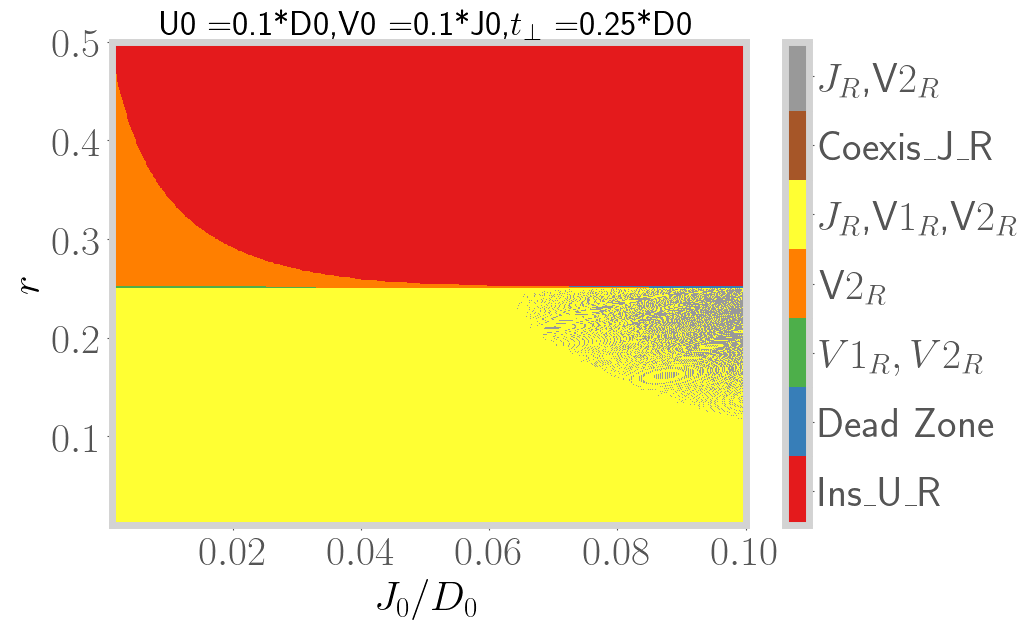

In [14]:

##### With two U_b,two J,two V when omega is fixed





import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.style.use('ggplot')
cols = [p['color'] for p in plt.rcParams['axes.prop_cycle']]
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{braket}\usepackage{nicefrac}')
plt.rcParams.update({'font.size': 30,
                     'figure.figsize': (11,7),
                     'axes.facecolor': 'white',
                     'axes.edgecolor': 'lightgray',
                     "figure.autolayout": 'True',
                     'axes.xmargin': 0.03,
                     'axes.ymargin': 0.05,
                     'axes.grid': False,
                     'axes.linewidth': 5,
                     'lines.markersize': 10,
                     'text.usetex': True,
                     'lines.linewidth': 8,
                     "legend.frameon": True,
                     "legend.framealpha": 0.7,
                     "legend.handletextpad": 1,
                     "legend.edgecolor": "gray",
                     "legend.handlelength": 1,
                     "legend.labelspacing": 0,
                     "legend.columnspacing": 1,
                     "legend.fontsize": 35,
                    })
linestyles = ["-", "--", ":"]






from time import sleep
import numpy as np
import matplotlib.pyplot as plt
import sys
from matplotlib import colors
from multiprocessing import Pool
from tqdm import tqdm


def RG_flow(J0,U0,D0,t,V10,V20,U_b,d):
    J = [J0]
    V1 = [V10]
    V2 = [V20]
    U = [U0]
    D = [D0]
    d_0_int = D[0]-(J[0]/4) - (U_b/4)
    d_0_int1 = d_0_int - (U[0]/2)
    d_0_int2  = d_0_int + (J[0]/4) + (U[0]/2)
    d_0_int3  = d_0_int + (J[0]/4)
    flag_J = True
    flag_V1 = True
    flag_V2 = True
    flag_U = True
    dens = []
    A1 = 0
    A2 = 0
    B1 = 0
    B2 = 0
    C1 = 0
    C2 = 0
    D1 = 0
    D2 = 0
    # print (J0,U_b,"---")
    while D[-1] > 0:
        d_0=D[0]/2 + D[-1]/2-(J[-1]/4)  - (U_b/4)
        
        A1 = 1/(d_0 - t) if (d_0 - t) * (d_0_int - t) > 0 else 0
        A2 = 1/(d_0 + t) if (d_0 + t) * (d_0_int + t) > 0 else 0
         
        B1 = 1/(d_0 - (U[-1]/2) - t) if (d_0 - (U[-1]/2) - t) * (d_0_int1 - t)  > 0 else 0
        B2 = 1/(d_0 - (U[-1]/2) + t) if (d_0 - (U[-1]/2) + t) * (d_0_int1 + t)  > 0 else 0
        
        C1 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) - t ) if (d_0 + (J[-1]/4) + (U[-1]/2) - t) * (d_0_int2 - t) > 0 else 0
        C2 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) + t ) if (d_0 + (J[-1]/4) + (U[-1]/2) + t) * (d_0_int2 + t) > 0 else 0
        
        D1 = 1/(d_0 + (J[-1]/4) - t ) if (d_0 + (J[-1]/4) - t) * (d_0_int3 - t) > 0 else 0
        D2 = 1/(d_0 + (J[-1]/4) + t ) if (d_0 + (J[-1]/4) + t) * (d_0_int3 + t) > 0 else 0
            
        delta_J = J[-1]*(J[-1] + 4*U_b)*(A1 + A2)*0.5*d
        
        if (J[-1] + delta_J) * J[-1] > 0 and flag_J:
            J.append(J[-1] + delta_J)
        else :
            flag_J =False
            J.append(0)
            
        delta_V_1_1 = ((3*J[-1]*V1[-1])/8)*(A2 + B2)*d 
        delta_V_1_2 = ((V1[-1] * U_b)/2)*(C1 + D1 + B2 + A2)*d
        delta_V_1 =  delta_V_1_1 + delta_V_1_2 
       
            
        if (V1[-1] + delta_V_1) * V1[-1] > 0 and flag_V1:
            V1.append(min(V1[-1] + delta_V_1,10**120))
        else :
            V1.append(0)
            flag_V1 = False
        #print(A2,B2,V1[-1])
        delta_V_2_1 = ((3*J[-1]*V2[-1])/8)*(A1 + B1)*d 
        delta_V_2_2 = ((V2[-1] * U_b)/2)*(C2 + D2 + B1 + A1)*d
        delta_V_2 =  delta_V_2_1 + delta_V_2_2 
        
        if (V2[-1] + delta_V_2) * V2[-1] > 0 and flag_V2:
            V2.append(min(V2[-1] + delta_V_2,10**120))
        else :
            V2.append(0)
            flag_V2 = False
            
            
        delta_U = (4*(V1[-1]**2 + V2[-1]**2)*(C1 + C2 - B1 - B2)+ J[-1]**2*(A1 + A2))* d
        
       
    
        if (U[-1] + delta_U) * U[-1] > 0 and flag_U:
            U.append(U[-1] + delta_U)
        else :
            U.append(0)
            flag_U = False
        D.append(D[-1]-d)
        
    return V1, V2, J, U, D
    
def RG(y,r,U0,D0,t,V_by_J,d=0.01):
    W = []
    
    for r_i in tqdm(r):
        W.append([])
        for J0 in y :
            V10 = J0*V_by_J
            V20 = J0*V_by_J
            U_b = r_i * J0
            V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
            
            if J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 > 0.3:
                flag = 0
            elif J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 < 0.3:
                #print (J0, V10, V20, U0, U_b, J[-1]/J0, V1[-1]/V10, V2[-1]/V20, U[-1]/U0)
                flag = 1
            elif J[-1]/J0 < 1  and V1[-1]/V10 > 1  and V2[-1]/V20 > 1:
                flag = 2
            elif J[-1]/J0 < 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 3
            elif J[-1]/J0 > 1  and V1[-1]/V10 > 1 and V2[-1]/V20 > 1:
                flag = 4
            elif J[-1]/J0 > 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1:
                flag = 5
                # print (J[-1]/J0, V[-1]/V0)
                # print (dens)
            elif J[-1]/J0 > 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 6
                
            
            W[-1].append(flag)
            
    
    
    
    cmap = plt.cm.Set1
    norm = colors.BoundaryNorm(np.arange(-0.5, 7, 1), cmap.N)
    im1 = plt.imshow(W, origin='lower', cmap=cmap, norm=norm, aspect = "auto",extent=(min(y)/D0, max(y)/D0, min(abs(r)), max(abs(r))),interpolation="None")
    colorbar = plt.colorbar(ticks=np.linspace(0, 6, 7))
    colorbar.set_ticklabels(['Ins_U_R', 'Dead Zone','$V1_R,V2_R$','V$2_R$','$J_{R}$,V$1_{R}$,V$2_{R}$','Coexis_J_R', '$J_{R}$,V$2_{R}$'])
    plt.ylabel('$r$')
    plt.xlabel('$J_{0}/D_0$')
    plt.title('U0 ={U0}*D0,V0 ={V_by_J}*J0,$t_\perp$ ={t}*D0'.format(U0= U0/D0,V_by_J =V_by_J,t =t/D0),fontsize='small')
    #plt.yscale('log')
    plt.savefig("U_0*D_0 ={U0},V_0 ={V_by_J}*J0,t*D0 ={t}.pdf".format(U0= U0,V_by_J =V_by_J,t =t), bbox_inches='tight')
    plt.savefig("U_0*D_0 ={U0},V_0 ={V_by_J}*J0,t*D0 ={t}.png".format(U0= U0,V_by_J =V_by_J,t =t), bbox_inches='tight')
    plt.show()

D0 = 100
U0 = 0.1 * D0
#y = 10**np.linspace(-1,0, 40) * D0
y = np.linspace(0.001, 0.1, 700) * D0
#print(y)
#x = np.linspace(0.001, 2, 10) * D0
V_by_J = 0.1
#r = -10**np.linspace(-1,1, 40) 
r = -np.linspace(0.01,0.5,700) 
t = 0.25 * D0
RG(y,r,U0,D0,t,V_by_J,d=0.05)

100%|███████████████████████████████████████| 700/700 [3:28:32<00:00, 17.87s/it]


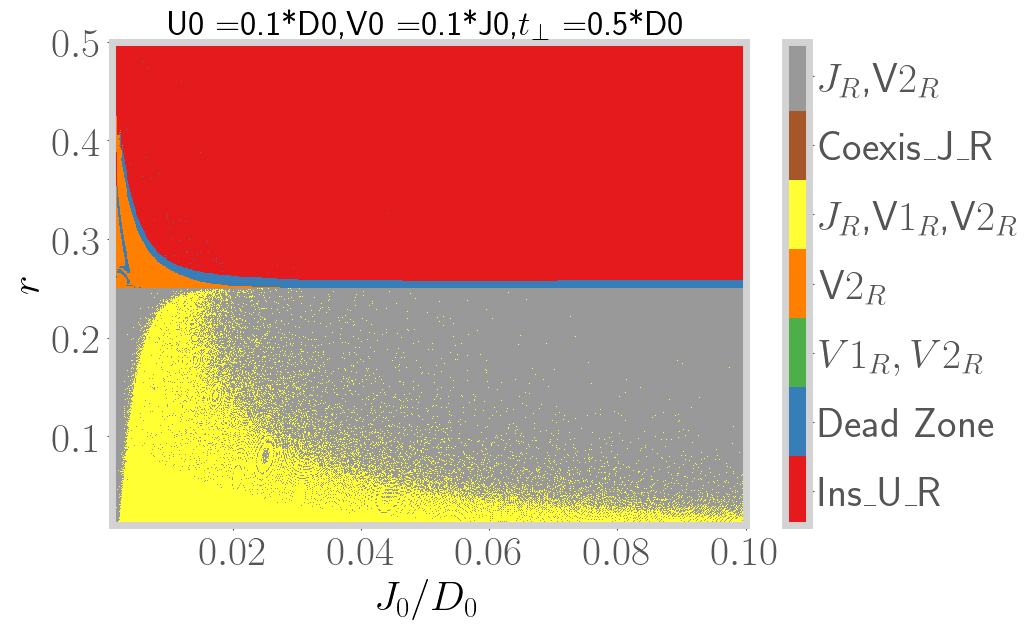

In [15]:

##### With two U_b,two J,two V when omega is fixed





import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.style.use('ggplot')
cols = [p['color'] for p in plt.rcParams['axes.prop_cycle']]
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{braket}\usepackage{nicefrac}')
plt.rcParams.update({'font.size': 30,
                     'figure.figsize': (11,7),
                     'axes.facecolor': 'white',
                     'axes.edgecolor': 'lightgray',
                     "figure.autolayout": 'True',
                     'axes.xmargin': 0.03,
                     'axes.ymargin': 0.05,
                     'axes.grid': False,
                     'axes.linewidth': 5,
                     'lines.markersize': 10,
                     'text.usetex': True,
                     'lines.linewidth': 8,
                     "legend.frameon": True,
                     "legend.framealpha": 0.7,
                     "legend.handletextpad": 1,
                     "legend.edgecolor": "gray",
                     "legend.handlelength": 1,
                     "legend.labelspacing": 0,
                     "legend.columnspacing": 1,
                     "legend.fontsize": 35,
                    })
linestyles = ["-", "--", ":"]






from time import sleep
import numpy as np
import matplotlib.pyplot as plt
import sys
from matplotlib import colors
from multiprocessing import Pool
from tqdm import tqdm


def RG_flow(J0,U0,D0,t,V10,V20,U_b,d):
    J = [J0]
    V1 = [V10]
    V2 = [V20]
    U = [U0]
    D = [D0]
    d_0_int = D[0]-(J[0]/4) - (U_b/4)
    d_0_int1 = d_0_int - (U[0]/2)
    d_0_int2  = d_0_int + (J[0]/4) + (U[0]/2)
    d_0_int3  = d_0_int + (J[0]/4)
    flag_J = True
    flag_V1 = True
    flag_V2 = True
    flag_U = True
    dens = []
    A1 = 0
    A2 = 0
    B1 = 0
    B2 = 0
    C1 = 0
    C2 = 0
    D1 = 0
    D2 = 0
    # print (J0,U_b,"---")
    while D[-1] > 0:
        d_0=D[0]/2 + D[-1]/2-(J[-1]/4)  - (U_b/4)
        
        A1 = 1/(d_0 - t) if (d_0 - t) * (d_0_int - t) > 0 else 0
        A2 = 1/(d_0 + t) if (d_0 + t) * (d_0_int + t) > 0 else 0
         
        B1 = 1/(d_0 - (U[-1]/2) - t) if (d_0 - (U[-1]/2) - t) * (d_0_int1 - t)  > 0 else 0
        B2 = 1/(d_0 - (U[-1]/2) + t) if (d_0 - (U[-1]/2) + t) * (d_0_int1 + t)  > 0 else 0
        
        C1 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) - t ) if (d_0 + (J[-1]/4) + (U[-1]/2) - t) * (d_0_int2 - t) > 0 else 0
        C2 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) + t ) if (d_0 + (J[-1]/4) + (U[-1]/2) + t) * (d_0_int2 + t) > 0 else 0
        
        D1 = 1/(d_0 + (J[-1]/4) - t ) if (d_0 + (J[-1]/4) - t) * (d_0_int3 - t) > 0 else 0
        D2 = 1/(d_0 + (J[-1]/4) + t ) if (d_0 + (J[-1]/4) + t) * (d_0_int3 + t) > 0 else 0
            
        delta_J = J[-1]*(J[-1] + 4*U_b)*(A1 + A2)*0.5*d
        
        if (J[-1] + delta_J) * J[-1] > 0 and flag_J:
            J.append(J[-1] + delta_J)
        else :
            flag_J =False
            J.append(0)
            
        delta_V_1_1 = ((3*J[-1]*V1[-1])/8)*(A2 + B2)*d 
        delta_V_1_2 = ((V1[-1] * U_b)/2)*(C1 + D1 + B2 + A2)*d
        delta_V_1 =  delta_V_1_1 + delta_V_1_2 
        
            
        if (V1[-1] + delta_V_1) * V1[-1] > 0 and flag_V1:
            V1.append(min(V1[-1] + delta_V_1,10**120))
        else :
            V1.append(0)
            flag_V1 = False
        #print(A2,B2,V1[-1])
        delta_V_2_1 = ((3*J[-1]*V2[-1])/8)*(A1 + B1)*d 
        delta_V_2_2 = ((V2[-1] * U_b)/2)*(C2 + D2 + B1 + A1)*d
        delta_V_2 =  delta_V_2_1 + delta_V_2_2 
       
        if (V2[-1] + delta_V_2) * V2[-1] > 0 and flag_V2:
            V2.append(min(V2[-1] + delta_V_2,10**120))
        else :
            V2.append(0)
            flag_V2 = False
            
            
        delta_U = (4*(V1[-1]**2 + V2[-1]**2)*(C1 + C2 - B1 - B2)+ J[-1]**2*(A1 + A2))* d
        
        
    
        if (U[-1] + delta_U) * U[-1] > 0 and flag_U:
            U.append(U[-1] + delta_U)
        else :
            U.append(0)
            flag_U = False
        D.append(D[-1]-d)
        
    return V1, V2, J, U, D
    
def RG(y,r,U0,D0,t,V_by_J,d=0.01):
    W = []
    
    for r_i in tqdm(r):
        W.append([])
        for J0 in y :
            V10 = J0*V_by_J
            V20 = J0*V_by_J
            U_b = r_i * J0
            V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
            
            if J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 > 0.3:
                flag = 0
            elif J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 < 0.3:
                #print (J0, V10, V20, U0, U_b, J[-1]/J0, V1[-1]/V10, V2[-1]/V20, U[-1]/U0)
                flag = 1
            elif J[-1]/J0 < 1  and V1[-1]/V10 > 1  and V2[-1]/V20 > 1:
                flag = 2
            elif J[-1]/J0 < 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 3
            elif J[-1]/J0 > 1  and V1[-1]/V10 > 1 and V2[-1]/V20 > 1:
                flag = 4
            elif J[-1]/J0 > 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1:
                flag = 5
                # print (J[-1]/J0, V[-1]/V0)
                # print (dens)
            elif J[-1]/J0 > 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 6
            W[-1].append(flag)
            
    
    
    
    cmap = plt.cm.Set1
    norm = colors.BoundaryNorm(np.arange(-0.5, 7, 1), cmap.N)
    im1 = plt.imshow(W, origin='lower', cmap=cmap, norm=norm, aspect = "auto",extent=(min(y)/D0, max(y)/D0, min(abs(r)), max(abs(r))),interpolation="None")
    colorbar = plt.colorbar(ticks=np.linspace(0, 6, 7))
    colorbar.set_ticklabels(['Ins_U_R', 'Dead Zone','$V1_R,V2_R$','V$2_R$','$J_{R}$,V$1_{R}$,V$2_{R}$','Coexis_J_R', '$J_{R}$,V$2_{R}$'])
    plt.ylabel('$r$')
    plt.xlabel('$J_{0}/D_0$')
    plt.title('U0 ={U0}*D0,V0 ={V_by_J}*J0,$t_\perp$ ={t}*D0'.format(U0= U0/D0,V_by_J =V_by_J,t =t/D0),fontsize='small')
    #plt.yscale('log')
    plt.savefig("U_0*D_0 ={U0},V_0 ={V_by_J}*J0,t*D0 ={t}.pdf".format(U0= U0,V_by_J =V_by_J,t =t), bbox_inches='tight')
    plt.savefig("U_0*D_0 ={U0},V_0 ={V_by_J}*J0,t*D0 ={t}.png".format(U0= U0,V_by_J =V_by_J,t =t), bbox_inches='tight')
    plt.show()

D0 = 100
U0 = 0.1 * D0
#y = 10**np.linspace(-1,0, 40) * D0
y = np.linspace(0.001, 0.1, 700) * D0
#print(y)
#x = np.linspace(0.001, 2, 10) * D0
V_by_J = 0.1
#r = -10**np.linspace(-1,1, 40) 
r = -np.linspace(0.01,0.5,700) 
t = 0.5 * D0
RG(y,r,U0,D0,t,V_by_J,d=0.05)

100%|███████████████████████████████████████| 700/700 [3:29:42<00:00, 17.98s/it]


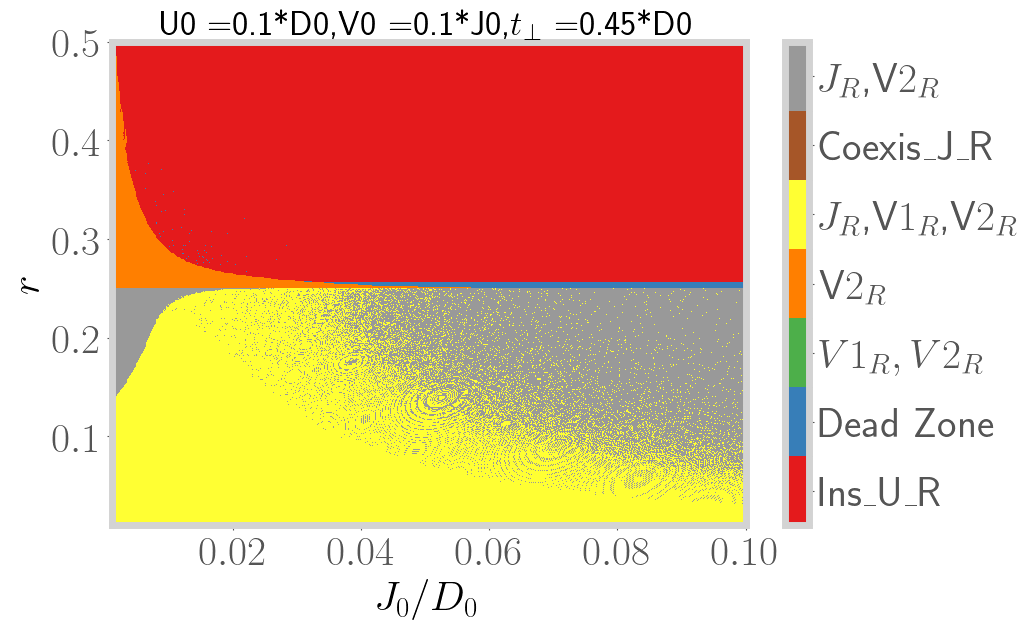

In [16]:

##### With two U_b,two J,two V when omega is fixed





import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.style.use('ggplot')
cols = [p['color'] for p in plt.rcParams['axes.prop_cycle']]
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{braket}\usepackage{nicefrac}')
plt.rcParams.update({'font.size': 30,
                     'figure.figsize': (11,7),
                     'axes.facecolor': 'white',
                     'axes.edgecolor': 'lightgray',
                     "figure.autolayout": 'True',
                     'axes.xmargin': 0.03,
                     'axes.ymargin': 0.05,
                     'axes.grid': False,
                     'axes.linewidth': 5,
                     'lines.markersize': 10,
                     'text.usetex': True,
                     'lines.linewidth': 8,
                     "legend.frameon": True,
                     "legend.framealpha": 0.7,
                     "legend.handletextpad": 1,
                     "legend.edgecolor": "gray",
                     "legend.handlelength": 1,
                     "legend.labelspacing": 0,
                     "legend.columnspacing": 1,
                     "legend.fontsize": 35,
                    })
linestyles = ["-", "--", ":"]






from time import sleep
import numpy as np
import matplotlib.pyplot as plt
import sys
from matplotlib import colors
from multiprocessing import Pool
from tqdm import tqdm


def RG_flow(J0,U0,D0,t,V10,V20,U_b,d):
    J = [J0]
    V1 = [V10]
    V2 = [V20]
    U = [U0]
    D = [D0]
    d_0_int = D[0]-(J[0]/4) - (U_b/4)
    d_0_int1 = d_0_int - (U[0]/2)
    d_0_int2  = d_0_int + (J[0]/4) + (U[0]/2)
    d_0_int3  = d_0_int + (J[0]/4)
    flag_J = True
    flag_V1 = True
    flag_V2 = True
    flag_U = True
    dens = []
    A1 = 0
    A2 = 0
    B1 = 0
    B2 = 0
    C1 = 0
    C2 = 0
    D1 = 0
    D2 = 0
    # print (J0,U_b,"---")
    while D[-1] > 0:
        d_0=D[0]/2 + D[-1]/2-(J[-1]/4)  - (U_b/4)
        
        A1 = 1/(d_0 - t) if (d_0 - t) * (d_0_int - t) > 0 else 0
        A2 = 1/(d_0 + t) if (d_0 + t) * (d_0_int + t) > 0 else 0
         
        B1 = 1/(d_0 - (U[-1]/2) - t) if (d_0 - (U[-1]/2) - t) * (d_0_int1 - t)  > 0 else 0
        B2 = 1/(d_0 - (U[-1]/2) + t) if (d_0 - (U[-1]/2) + t) * (d_0_int1 + t)  > 0 else 0
        
        C1 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) - t ) if (d_0 + (J[-1]/4) + (U[-1]/2) - t) * (d_0_int2 - t) > 0 else 0
        C2 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) + t ) if (d_0 + (J[-1]/4) + (U[-1]/2) + t) * (d_0_int2 + t) > 0 else 0
        
        D1 = 1/(d_0 + (J[-1]/4) - t ) if (d_0 + (J[-1]/4) - t) * (d_0_int3 - t) > 0 else 0
        D2 = 1/(d_0 + (J[-1]/4) + t ) if (d_0 + (J[-1]/4) + t) * (d_0_int3 + t) > 0 else 0
            
        delta_J = J[-1]*(J[-1] + 4*U_b)*(A1 + A2)*0.5*d
        
        if (J[-1] + delta_J) * J[-1] > 0 and flag_J:
            J.append(J[-1] + delta_J)
        else :
            flag_J =False
            J.append(0)
            
        delta_V_1_1 = ((3*J[-1]*V1[-1])/8)*(A2 + B2)*d 
        delta_V_1_2 = ((V1[-1] * U_b)/2)*(C1 + D1 + B2 + A2)*d
        delta_V_1 =  delta_V_1_1 + delta_V_1_2 
        
            
        if (V1[-1] + delta_V_1) * V1[-1] > 0 and flag_V1:
            V1.append(min(V1[-1] + delta_V_1,10**120))
        else :
            V1.append(0)
            flag_V1 = False
        #print(A2,B2,V1[-1])
        delta_V_2_1 = ((3*J[-1]*V2[-1])/8)*(A1 + B1)*d 
        delta_V_2_2 = ((V2[-1] * U_b)/2)*(C2 + D2 + B1 + A1)*d
        delta_V_2 =  delta_V_2_1 + delta_V_2_2 
       
        if (V2[-1] + delta_V_2) * V2[-1] > 0 and flag_V2:
            V2.append(min(V2[-1] + delta_V_2,10**120))
        else :
            V2.append(0)
            flag_V2 = False
            
            
        delta_U = (4*(V1[-1]**2 + V2[-1]**2)*(C1 + C2 - B1 - B2)+ J[-1]**2*(A1 + A2))* d
        
        
    
        if (U[-1] + delta_U) * U[-1] > 0 and flag_U:
            U.append(U[-1] + delta_U)
        else :
            U.append(0)
            flag_U = False
        D.append(D[-1]-d)
        
    return V1, V2, J, U, D
    
def RG(y,r,U0,D0,t,V_by_J,d=0.01):
    W = []
    
    for r_i in tqdm(r):
        W.append([])
        for J0 in y :
            V10 = J0*V_by_J
            V20 = J0*V_by_J
            U_b = r_i * J0
            V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
            
            if J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 > 0.3:
                flag = 0
            elif J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 < 0.3:
                #print (J0, V10, V20, U0, U_b, J[-1]/J0, V1[-1]/V10, V2[-1]/V20, U[-1]/U0)
                flag = 1
            elif J[-1]/J0 < 1  and V1[-1]/V10 > 1  and V2[-1]/V20 > 1:
                flag = 2
            elif J[-1]/J0 < 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 3
            elif J[-1]/J0 > 1  and V1[-1]/V10 > 1 and V2[-1]/V20 > 1:
                flag = 4
            elif J[-1]/J0 > 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1:
                flag = 5
                # print (J[-1]/J0, V[-1]/V0)
                # print (dens)
            elif J[-1]/J0 > 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 6
            W[-1].append(flag)
            
    
    
    
    cmap = plt.cm.Set1
    norm = colors.BoundaryNorm(np.arange(-0.5, 7, 1), cmap.N)
    im1 = plt.imshow(W, origin='lower', cmap=cmap, norm=norm, aspect = "auto",extent=(min(y)/D0, max(y)/D0, min(abs(r)), max(abs(r))),interpolation="None")
    colorbar = plt.colorbar(ticks=np.linspace(0, 6, 7))
    colorbar.set_ticklabels(['Ins_U_R', 'Dead Zone','$V1_R,V2_R$','V$2_R$','$J_{R}$,V$1_{R}$,V$2_{R}$','Coexis_J_R', '$J_{R}$,V$2_{R}$'])
    plt.ylabel('$r$')
    plt.xlabel('$J_{0}/D_0$')
    plt.title('U0 ={U0}*D0,V0 ={V_by_J}*J0,$t_\perp$ ={t}*D0'.format(U0= U0/D0,V_by_J =V_by_J,t =t/D0),fontsize='small')
    #plt.yscale('log')
    plt.savefig("U_0*D_0 ={U0},V_0 ={V_by_J}*J0,t*D0 ={t}.pdf".format(U0= U0,V_by_J =V_by_J,t =t), bbox_inches='tight')
    plt.savefig("U_0*D_0 ={U0},V_0 ={V_by_J}*J0,t*D0 ={t}.png".format(U0= U0,V_by_J =V_by_J,t =t), bbox_inches='tight')
    plt.show()

D0 = 100
U0 = 0.1 * D0
#y = 10**np.linspace(-1,0, 40) * D0
y = np.linspace(0.001, 0.1, 700) * D0
#print(y)
#x = np.linspace(0.001, 2, 10) * D0
V_by_J = 0.1
#r = -10**np.linspace(-1,1, 40) 
r = -np.linspace(0.01,0.5,700) 
t = 0.45 * D0
RG(y,r,U0,D0,t,V_by_J,d=0.05)

In [12]:
## Changing V0/J0

100%|███████████████████████████████████████| 700/700 [3:28:44<00:00, 17.89s/it]


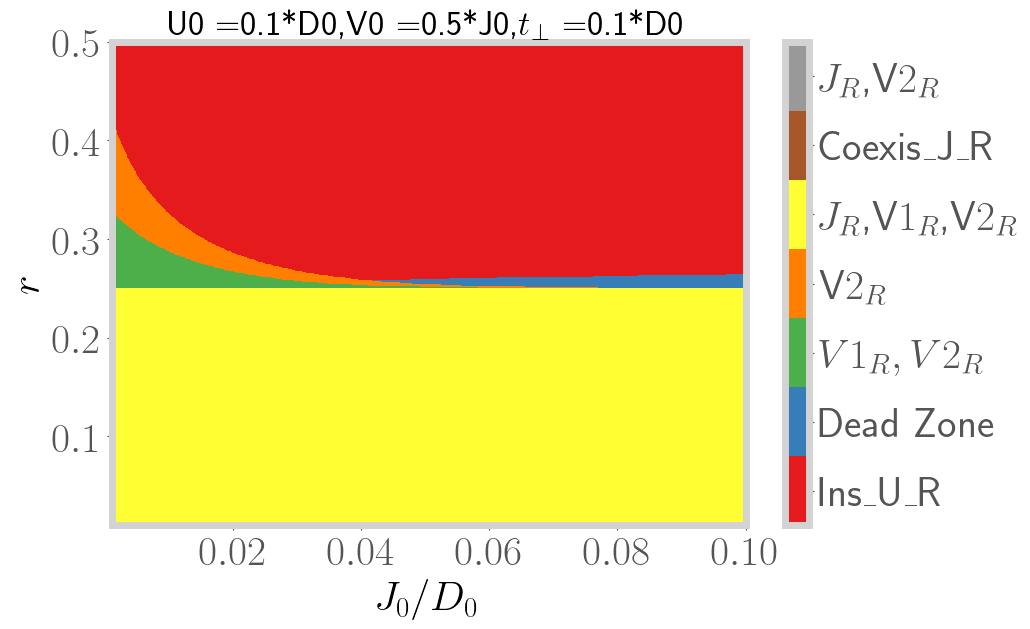

In [17]:

##### With two U_b,two J,two V when omega is fixed





import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.style.use('ggplot')
cols = [p['color'] for p in plt.rcParams['axes.prop_cycle']]
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{braket}\usepackage{nicefrac}')
plt.rcParams.update({'font.size': 30,
                     'figure.figsize': (11,7),
                     'axes.facecolor': 'white',
                     'axes.edgecolor': 'lightgray',
                     "figure.autolayout": 'True',
                     'axes.xmargin': 0.03,
                     'axes.ymargin': 0.05,
                     'axes.grid': False,
                     'axes.linewidth': 5,
                     'lines.markersize': 10,
                     'text.usetex': True,
                     'lines.linewidth': 8,
                     "legend.frameon": True,
                     "legend.framealpha": 0.7,
                     "legend.handletextpad": 1,
                     "legend.edgecolor": "gray",
                     "legend.handlelength": 1,
                     "legend.labelspacing": 0,
                     "legend.columnspacing": 1,
                     "legend.fontsize": 35,
                    })
linestyles = ["-", "--", ":"]






from time import sleep
import numpy as np
import matplotlib.pyplot as plt
import sys
from matplotlib import colors
from multiprocessing import Pool
from tqdm import tqdm


def RG_flow(J0,U0,D0,t,V10,V20,U_b,d):
    J = [J0]
    V1 = [V10]
    V2 = [V20]
    U = [U0]
    D = [D0]
    d_0_int = D[0]-(J[0]/4) - (U_b/4)
    d_0_int1 = d_0_int - (U[0]/2)
    d_0_int2  = d_0_int + (J[0]/4) + (U[0]/2)
    d_0_int3  = d_0_int + (J[0]/4)
    flag_J = True
    flag_V1 = True
    flag_V2 = True
    flag_U = True
    dens = []
    A1 = 0
    A2 = 0
    B1 = 0
    B2 = 0
    C1 = 0
    C2 = 0
    D1 = 0
    D2 = 0
    # print (J0,U_b,"---")
    while D[-1] > 0:
        d_0=D[0]/2 + D[-1]/2-(J[-1]/4)  - (U_b/4)
        
        A1 = 1/(d_0 - t) if (d_0 - t) * (d_0_int - t) > 0 else 0
        A2 = 1/(d_0 + t) if (d_0 + t) * (d_0_int + t) > 0 else 0
         
        B1 = 1/(d_0 - (U[-1]/2) - t) if (d_0 - (U[-1]/2) - t) * (d_0_int1 - t)  > 0 else 0
        B2 = 1/(d_0 - (U[-1]/2) + t) if (d_0 - (U[-1]/2) + t) * (d_0_int1 + t)  > 0 else 0
        
        C1 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) - t ) if (d_0 + (J[-1]/4) + (U[-1]/2) - t) * (d_0_int2 - t) > 0 else 0
        C2 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) + t ) if (d_0 + (J[-1]/4) + (U[-1]/2) + t) * (d_0_int2 + t) > 0 else 0
        
        D1 = 1/(d_0 + (J[-1]/4) - t ) if (d_0 + (J[-1]/4) - t) * (d_0_int3 - t) > 0 else 0
        D2 = 1/(d_0 + (J[-1]/4) + t ) if (d_0 + (J[-1]/4) + t) * (d_0_int3 + t) > 0 else 0
            
        delta_J = J[-1]*(J[-1] + 4*U_b )*(A1 + A2)*0.5*d
        
        if (J[-1] + delta_J) * J[-1] > 0 and flag_J:
            J.append(J[-1] + delta_J)
        else :
            flag_J =False
            J.append(0)
            
        delta_V_1_1 = ((3*J[-1]*V1[-1])/8)*(A2 + B2)*d 
        delta_V_1_2 = ((V1[-1] * U_b)/2)*(C1 + D1 + B2 + A2)*d
        delta_V_1 =  delta_V_1_1 + delta_V_1_2 
        
            
        if (V1[-1] + delta_V_1) * V1[-1] > 0 and flag_V1:
            V1.append(min(V1[-1] + delta_V_1,10**120))
        else :
            V1.append(0)
            flag_V1 = False
        #print(A2,B2,V1[-1])
        delta_V_2_1 = ((3*J[-1]*V2[-1])/8)*(A1 + B1)*d 
        delta_V_2_2 = ((V2[-1] * U_b)/2)*(C2 + D2 + B1 + A1)*d
        delta_V_2 =  delta_V_2_1 + delta_V_2_2 
        
        if (V2[-1] + delta_V_2) * V2[-1] > 0 and flag_V2:
            V2.append(min(V2[-1] + delta_V_2,10**120))
        else :
            V2.append(0)
            flag_V2 = False
            
            
        delta_U = (4*(V1[-1]**2 + V2[-1]**2)*(C1 + C2 - B1 - B2)+ J[-1]**2*(A1 + A2))* d
        
        
    
        if (U[-1] + delta_U) * U[-1] > 0 and flag_U:
            U.append(U[-1] + delta_U)
        else :
            U.append(0)
            flag_U = False
        D.append(D[-1]-d)
        
    return V1, V2, J, U, D
    
def RG(y,r,U0,D0,t,V_by_J,d=0.01):
    W = []
    
    for r_i in tqdm(r):
        W.append([])
        for J0 in y :
            V10 = J0*V_by_J
            V20 = J0*V_by_J
            U_b = r_i * J0
            V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
            
            if J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 > 0.3:
                flag = 0
            elif J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 < 0.3:
                #print (J0, V10, V20, U0, U_b, J[-1]/J0, V1[-1]/V10, V2[-1]/V20, U[-1]/U0)
                flag = 1
            elif J[-1]/J0 < 1  and V1[-1]/V10 > 1  and V2[-1]/V20 > 1:
                flag = 2
            elif J[-1]/J0 < 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 3
            elif J[-1]/J0 > 1  and V1[-1]/V10 > 1 and V2[-1]/V20 > 1:
                flag = 4
            elif J[-1]/J0 > 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1:
                flag = 5
                # print (J[-1]/J0, V[-1]/V0)
                # print (dens)
            elif J[-1]/J0 > 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 6
            W[-1].append(flag)
            
    
    
    
    cmap = plt.cm.Set1
    norm = colors.BoundaryNorm(np.arange(-0.5, 7, 1), cmap.N)
    im1 = plt.imshow(W, origin='lower', cmap=cmap, norm=norm, aspect = "auto",extent=(min(y)/D0, max(y)/D0, min(abs(r)), max(abs(r))),interpolation="None")
    colorbar = plt.colorbar(ticks=np.linspace(0, 6, 7))
    colorbar.set_ticklabels(['Ins_U_R', 'Dead Zone','$V1_R,V2_R$','V$2_R$','$J_{R}$,V$1_{R}$,V$2_{R}$','Coexis_J_R', '$J_{R}$,V$2_{R}$'])
    plt.ylabel('$r$')
    plt.xlabel('$J_{0}/D_0$')
    plt.title('U0 ={U0}*D0,V0 ={V_by_J}*J0,$t_\perp$ ={t}*D0'.format(U0= U0/D0,V_by_J =V_by_J,t =t/D0),fontsize='small')
    #plt.yscale('log')
    plt.savefig("U_0*D_0 ={U0},V_0 ={V_by_J}*J0,t*D0 ={t}.pdf".format(U0= U0,V_by_J =V_by_J,t =t), bbox_inches='tight')
    plt.savefig("U_0*D_0 ={U0},V_0 ={V_by_J}*J0,t*D0 ={t}.png".format(U0= U0,V_by_J =V_by_J,t =t), bbox_inches='tight')
    plt.show()

D0 = 100
U0 = 0.1 * D0
#y = 10**np.linspace(-1,0, 40) * D0
y = np.linspace(0.001, 0.1, 700) * D0
#print(y)
#x = np.linspace(0.001, 2, 10) * D0
V_by_J = 0.5
#r = -10**np.linspace(-1,1, 40) 
r = -np.linspace(0.01,0.5,700) 
t = 0.1 * D0
RG(y,r,U0,D0,t,V_by_J,d=0.05)

100%|███████████████████████████████████████| 700/700 [3:26:46<00:00, 17.72s/it]


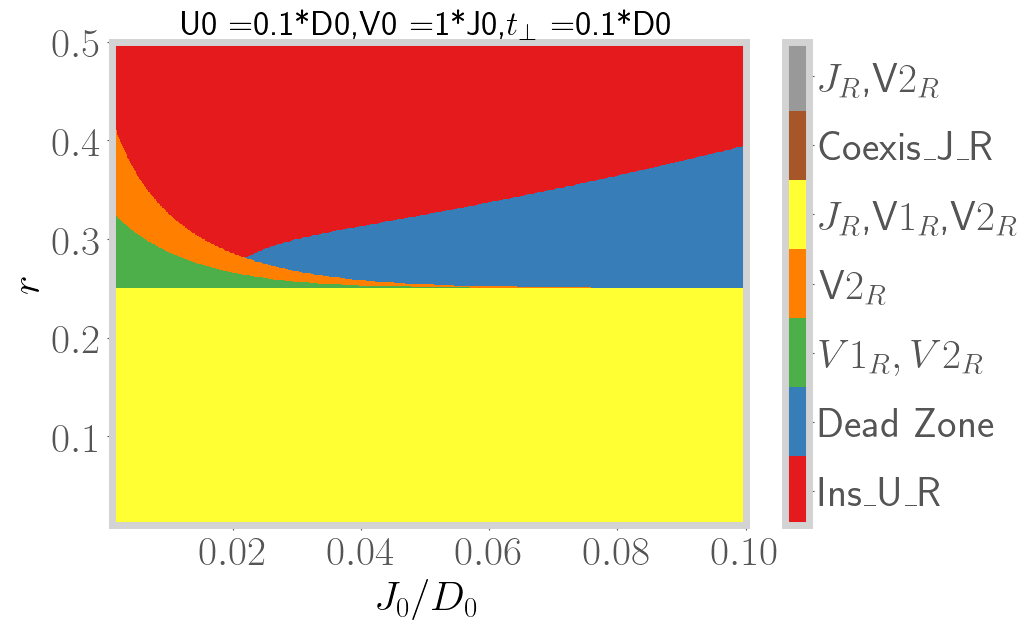

In [18]:

##### With two U_b,two J,two V when omega is fixed





import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.style.use('ggplot')
cols = [p['color'] for p in plt.rcParams['axes.prop_cycle']]
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{braket}\usepackage{nicefrac}')
plt.rcParams.update({'font.size': 30,
                     'figure.figsize': (11,7),
                     'axes.facecolor': 'white',
                     'axes.edgecolor': 'lightgray',
                     "figure.autolayout": 'True',
                     'axes.xmargin': 0.03,
                     'axes.ymargin': 0.05,
                     'axes.grid': False,
                     'axes.linewidth': 5,
                     'lines.markersize': 10,
                     'text.usetex': True,
                     'lines.linewidth': 8,
                     "legend.frameon": True,
                     "legend.framealpha": 0.7,
                     "legend.handletextpad": 1,
                     "legend.edgecolor": "gray",
                     "legend.handlelength": 1,
                     "legend.labelspacing": 0,
                     "legend.columnspacing": 1,
                     "legend.fontsize": 35,
                    })
linestyles = ["-", "--", ":"]






from time import sleep
import numpy as np
import matplotlib.pyplot as plt
import sys
from matplotlib import colors
from multiprocessing import Pool
from tqdm import tqdm


def RG_flow(J0,U0,D0,t,V10,V20,U_b,d):
    J = [J0]
    V1 = [V10]
    V2 = [V20]
    U = [U0]
    D = [D0]
    d_0_int = D[0]-(J[0]/4) - (U_b/4)
    d_0_int1 = d_0_int - (U[0]/2)
    d_0_int2  = d_0_int + (J[0]/4) + (U[0]/2)
    d_0_int3  = d_0_int + (J[0]/4)
    flag_J = True
    flag_V1 = True
    flag_V2 = True
    flag_U = True
    dens = []
    A1 = 0
    A2 = 0
    B1 = 0
    B2 = 0
    C1 = 0
    C2 = 0
    D1 = 0
    D2 = 0
    # print (J0,U_b,"---")
    while D[-1] > 0:
        d_0=D[0]/2 + D[-1]/2-(J[-1]/4)  - (U_b/4)
        
        A1 = 1/(d_0 - t) if (d_0 - t) * (d_0_int - t) > 0 else 0
        A2 = 1/(d_0 + t) if (d_0 + t) * (d_0_int + t) > 0 else 0
         
        B1 = 1/(d_0 - (U[-1]/2) - t) if (d_0 - (U[-1]/2) - t) * (d_0_int1 - t)  > 0 else 0
        B2 = 1/(d_0 - (U[-1]/2) + t) if (d_0 - (U[-1]/2) + t) * (d_0_int1 + t)  > 0 else 0
        
        C1 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) - t ) if (d_0 + (J[-1]/4) + (U[-1]/2) - t) * (d_0_int2 - t) > 0 else 0
        C2 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) + t ) if (d_0 + (J[-1]/4) + (U[-1]/2) + t) * (d_0_int2 + t) > 0 else 0
        
        D1 = 1/(d_0 + (J[-1]/4) - t ) if (d_0 + (J[-1]/4) - t) * (d_0_int3 - t) > 0 else 0
        D2 = 1/(d_0 + (J[-1]/4) + t ) if (d_0 + (J[-1]/4) + t) * (d_0_int3 + t) > 0 else 0
            
        delta_J = J[-1]*(J[-1] + 4*U_b )*(A1 + A2)*0.5*d
        
        if (J[-1] + delta_J) * J[-1] > 0 and flag_J:
            J.append(J[-1] + delta_J)
        else :
            flag_J =False
            J.append(0)
            
        delta_V_1_1 = ((3*J[-1]*V1[-1])/8)*(A2 + B2)*d 
        delta_V_1_2 = ((V1[-1] * U_b)/2)*(C1 + D1 + B2 + A2)*d
        delta_V_1 =  delta_V_1_1 + delta_V_1_2 
        
            
        if (V1[-1] + delta_V_1) * V1[-1] > 0 and flag_V1:
            V1.append(min(V1[-1] + delta_V_1,10**120))
        else :
            V1.append(0)
            flag_V1 = False
        #print(A2,B2,V1[-1])
        delta_V_2_1 = ((3*J[-1]*V2[-1])/8)*(A1 + B1)*d 
        delta_V_2_2 = ((V2[-1] * U_b)/2)*(C2 + D2 + B1 + A1)*d
        delta_V_2 =  delta_V_2_1 + delta_V_2_2 
        
        if (V2[-1] + delta_V_2) * V2[-1] > 0 and flag_V2:
            V2.append(min(V2[-1] + delta_V_2,10**120))
        else :
            V2.append(0)
            flag_V2 = False
            
            
        delta_U = (4*(V1[-1]**2 + V2[-1]**2)*(C1 + C2 - B1 - B2)+ J[-1]**2*(A1 + A2))* d
        
        
    
        if (U[-1] + delta_U) * U[-1] > 0 and flag_U:
            U.append(U[-1] + delta_U)
        else :
            U.append(0)
            flag_U = False
        D.append(D[-1]-d)
        
    return V1, V2, J, U, D
    
def RG(y,r,U0,D0,t,V_by_J,d=0.01):
    W = []
    
    for r_i in tqdm(r):
        W.append([])
        for J0 in y :
            V10 = J0*V_by_J
            V20 = J0*V_by_J
            U_b = r_i * J0
            V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
            
            if J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 > 0.3:
                flag = 0
            elif J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 < 0.3:
                #print (J0, V10, V20, U0, U_b, J[-1]/J0, V1[-1]/V10, V2[-1]/V20, U[-1]/U0)
                flag = 1
            elif J[-1]/J0 < 1  and V1[-1]/V10 > 1  and V2[-1]/V20 > 1:
                flag = 2
            elif J[-1]/J0 < 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 3
            elif J[-1]/J0 > 1  and V1[-1]/V10 > 1 and V2[-1]/V20 > 1:
                flag = 4
            elif J[-1]/J0 > 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1:
                flag = 5
                # print (J[-1]/J0, V[-1]/V0)
                # print (dens)
            elif J[-1]/J0 > 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 6
            W[-1].append(flag)
            
    
    
    
    cmap = plt.cm.Set1
    norm = colors.BoundaryNorm(np.arange(-0.5, 7, 1), cmap.N)
    im1 = plt.imshow(W, origin='lower', cmap=cmap, norm=norm, aspect = "auto",extent=(min(y)/D0, max(y)/D0, min(abs(r)), max(abs(r))),interpolation="None")
    colorbar = plt.colorbar(ticks=np.linspace(0, 6, 7))
    colorbar.set_ticklabels(['Ins_U_R', 'Dead Zone','$V1_R,V2_R$','V$2_R$','$J_{R}$,V$1_{R}$,V$2_{R}$','Coexis_J_R', '$J_{R}$,V$2_{R}$'])
    plt.ylabel('$r$')
    plt.xlabel('$J_{0}/D_0$')
    plt.title('U0 ={U0}*D0,V0 ={V_by_J}*J0,$t_\perp$ ={t}*D0'.format(U0= U0/D0,V_by_J =V_by_J,t =t/D0),fontsize='small')
    #plt.yscale('log')
    plt.savefig("U_0*D_0 ={U0},V_0 ={V_by_J}*J0,t*D0 ={t}.pdf".format(U0= U0,V_by_J =V_by_J,t =t), bbox_inches='tight')
    plt.savefig("U_0*D_0 ={U0},V_0 ={V_by_J}*J0,t*D0 ={t}.png".format(U0= U0,V_by_J =V_by_J,t =t), bbox_inches='tight')
    plt.show()
D0 = 100
U0 = 0.1 * D0
#y = 10**np.linspace(-1,0, 40) * D0
y = np.linspace(0.001, 0.1, 700) * D0
#print(y)
#x = np.linspace(0.001, 2, 10) * D0
V_by_J = 1
#r = -10**np.linspace(-1,1, 40) 
r = -np.linspace(0.01,0.5,700) 
t = 0.1 * D0
RG(y,r,U0,D0,t,V_by_J,d=0.05)

In [15]:
## Changing U0/D0

100%|███████████████████████████████████████| 700/700 [3:29:20<00:00, 17.94s/it]


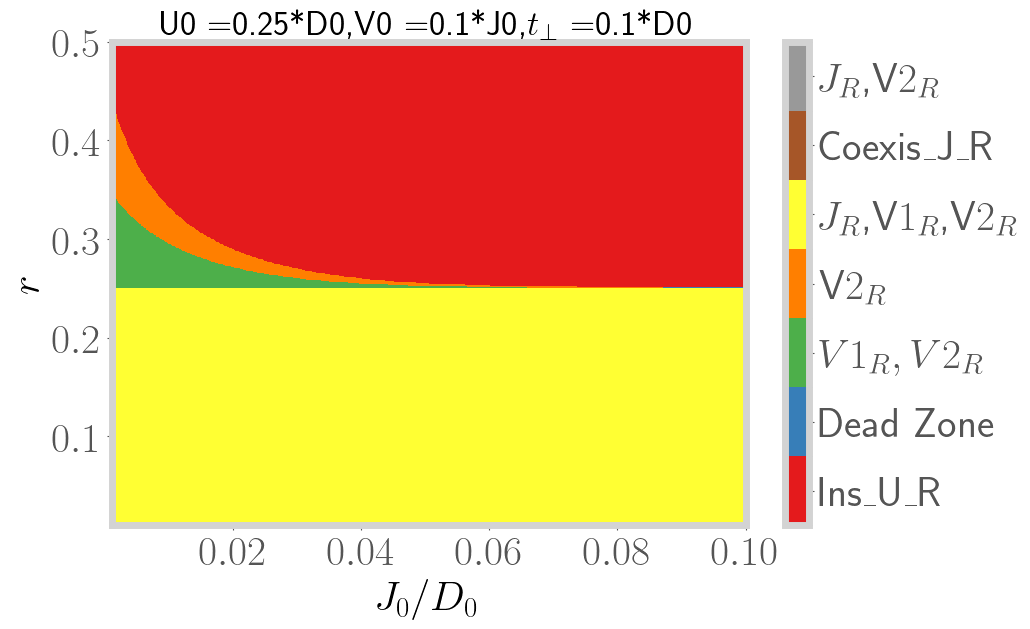

In [19]:

##### With two U_b,two J,two V when omega is fixed





import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.style.use('ggplot')
cols = [p['color'] for p in plt.rcParams['axes.prop_cycle']]
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{braket}\usepackage{nicefrac}')
plt.rcParams.update({'font.size': 30,
                     'figure.figsize': (11,7),
                     'axes.facecolor': 'white',
                     'axes.edgecolor': 'lightgray',
                     "figure.autolayout": 'True',
                     'axes.xmargin': 0.03,
                     'axes.ymargin': 0.05,
                     'axes.grid': False,
                     'axes.linewidth': 5,
                     'lines.markersize': 10,
                     'text.usetex': True,
                     'lines.linewidth': 8,
                     "legend.frameon": True,
                     "legend.framealpha": 0.7,
                     "legend.handletextpad": 1,
                     "legend.edgecolor": "gray",
                     "legend.handlelength": 1,
                     "legend.labelspacing": 0,
                     "legend.columnspacing": 1,
                     "legend.fontsize": 35,
                    })
linestyles = ["-", "--", ":"]






from time import sleep
import numpy as np
import matplotlib.pyplot as plt
import sys
from matplotlib import colors
from multiprocessing import Pool
from tqdm import tqdm


def RG_flow(J0,U0,D0,t,V10,V20,U_b,d):
    J = [J0]
    V1 = [V10]
    V2 = [V20]
    U = [U0]
    D = [D0]
    d_0_int = D[0]-(J[0]/4) - (U_b/4)
    d_0_int1 = d_0_int - (U[0]/2)
    d_0_int2  = d_0_int + (J[0]/4) + (U[0]/2)
    d_0_int3  = d_0_int + (J[0]/4)
    flag_J = True
    flag_V1 = True
    flag_V2 = True
    flag_U = True
    dens = []
    A1 = 0
    A2 = 0
    B1 = 0
    B2 = 0
    C1 = 0
    C2 = 0
    D1 = 0
    D2 = 0
    # print (J0,U_b,"---")
    while D[-1] > 0:
        d_0=D[0]/2 + D[-1]/2-(J[-1]/4)  - (U_b/4)
        
        A1 = 1/(d_0 - t) if (d_0 - t) * (d_0_int - t) > 0 else 0
        A2 = 1/(d_0 + t) if (d_0 + t) * (d_0_int + t) > 0 else 0
         
        B1 = 1/(d_0 - (U[-1]/2) - t) if (d_0 - (U[-1]/2) - t) * (d_0_int1 - t)  > 0 else 0
        B2 = 1/(d_0 - (U[-1]/2) + t) if (d_0 - (U[-1]/2) + t) * (d_0_int1 + t)  > 0 else 0
        
        C1 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) - t ) if (d_0 + (J[-1]/4) + (U[-1]/2) - t) * (d_0_int2 - t) > 0 else 0
        C2 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) + t ) if (d_0 + (J[-1]/4) + (U[-1]/2) + t) * (d_0_int2 + t) > 0 else 0
        
        D1 = 1/(d_0 + (J[-1]/4) - t ) if (d_0 + (J[-1]/4) - t) * (d_0_int3 - t) > 0 else 0
        D2 = 1/(d_0 + (J[-1]/4) + t ) if (d_0 + (J[-1]/4) + t) * (d_0_int3 + t) > 0 else 0
            
        delta_J = J[-1]*(J[-1] + 4*U_b)*(A1 + A2)*0.5*d
        
        if (J[-1] + delta_J) * J[-1] > 0 and flag_J:
            J.append(J[-1] + delta_J)
        else :
            flag_J =False
            J.append(0)
            
        delta_V_1_1 = ((3*J[-1]*V1[-1])/8)*(A2 + B2)*d 
        delta_V_1_2 = ((V1[-1] * U_b)/2)*(C1 + D1 + B2 + A2)*d
        delta_V_1 =  delta_V_1_1 + delta_V_1_2 
        
            
        if (V1[-1] + delta_V_1) * V1[-1] > 0 and flag_V1:
            V1.append(min(V1[-1] + delta_V_1,10**120))
        else :
            V1.append(0)
            flag_V1 = False
        #print(A2,B2,V1[-1])
        delta_V_2_1 = ((3*J[-1]*V2[-1])/8)*(A1 + B1)*d 
        delta_V_2_2 = ((V2[-1] * U_b)/2)*(C2 + D2 + B1 + A1)*d
        delta_V_2 =  delta_V_2_1 + delta_V_2_2 
       
        if (V2[-1] + delta_V_2) * V2[-1] > 0 and flag_V2:
            V2.append(min(V2[-1] + delta_V_2,10**120))
        else :
            V2.append(0)
            flag_V2 = False
            
            
        delta_U = (4*(V1[-1]**2 + V2[-1]**2)*(C1 + C2 - B1 - B2)+ J[-1]**2*(A1 + A2))* d
        
        
    
        if (U[-1] + delta_U) * U[-1] > 0 and flag_U:
            U.append(U[-1] + delta_U)
        else :
            U.append(0)
            flag_U = False
        D.append(D[-1]-d)
        
    return V1, V2, J, U, D
    
def RG(y,r,U0,D0,t,V_by_J,d=0.01):
    W = []
    
    for r_i in tqdm(r):
        W.append([])
        for J0 in y :
            V10 = J0*V_by_J
            V20 = J0*V_by_J
            U_b = r_i * J0
            V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
            
            if J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 > 0.3:
                flag = 0
            elif J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 < 0.3:
                #print (J0, V10, V20, U0, U_b, J[-1]/J0, V1[-1]/V10, V2[-1]/V20, U[-1]/U0)
                flag = 1
            elif J[-1]/J0 < 1  and V1[-1]/V10 > 1  and V2[-1]/V20 > 1:
                flag = 2
            elif J[-1]/J0 < 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 3
            elif J[-1]/J0 > 1  and V1[-1]/V10 > 1 and V2[-1]/V20 > 1:
                flag = 4
            elif J[-1]/J0 > 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1:
                flag = 5
                # print (J[-1]/J0, V[-1]/V0)
                # print (dens)
            elif J[-1]/J0 > 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 6
            W[-1].append(flag)
            
    
    
    
    cmap = plt.cm.Set1
    norm = colors.BoundaryNorm(np.arange(-0.5, 7, 1), cmap.N)
    im1 = plt.imshow(W, origin='lower', cmap=cmap, norm=norm, aspect = "auto",extent=(min(y)/D0, max(y)/D0, min(abs(r)), max(abs(r))),interpolation="None")
    colorbar = plt.colorbar(ticks=np.linspace(0, 6, 7))
    colorbar.set_ticklabels(['Ins_U_R', 'Dead Zone','$V1_R,V2_R$','V$2_R$','$J_{R}$,V$1_{R}$,V$2_{R}$','Coexis_J_R', '$J_{R}$,V$2_{R}$'])
    plt.ylabel('$r$')
    plt.xlabel('$J_{0}/D_0$')
    plt.title('U0 ={U0}*D0,V0 ={V_by_J}*J0,$t_\perp$ ={t}*D0'.format(U0= U0/D0,V_by_J =V_by_J,t =t/D0),fontsize='small')
    #plt.yscale('log')
    plt.savefig("U_0*D_0 ={U0},V_0 ={V_by_J}*J0,t*D0 ={t}.pdf".format(U0= U0,V_by_J =V_by_J,t =t), bbox_inches='tight')
    plt.savefig("U_0*D_0 ={U0},V_0 ={V_by_J}*J0,t*D0 ={t}.png".format(U0= U0,V_by_J =V_by_J,t =t), bbox_inches='tight')
    plt.show()

D0 = 100
U0 = 0.25 * D0
#y = 10**np.linspace(-1,0, 40) * D0
y = np.linspace(0.001, 0.1, 700) * D0
#print(y)
#x = np.linspace(0.001, 2, 10) * D0
V_by_J = 0.1
#r = -10**np.linspace(-1,1, 40) 
r = -np.linspace(0.01,0.5,700) 
t = 0.1 * D0
RG(y,r,U0,D0,t,V_by_J,d=0.05)

100%|███████████████████████████████████████| 700/700 [3:28:37<00:00, 17.88s/it]


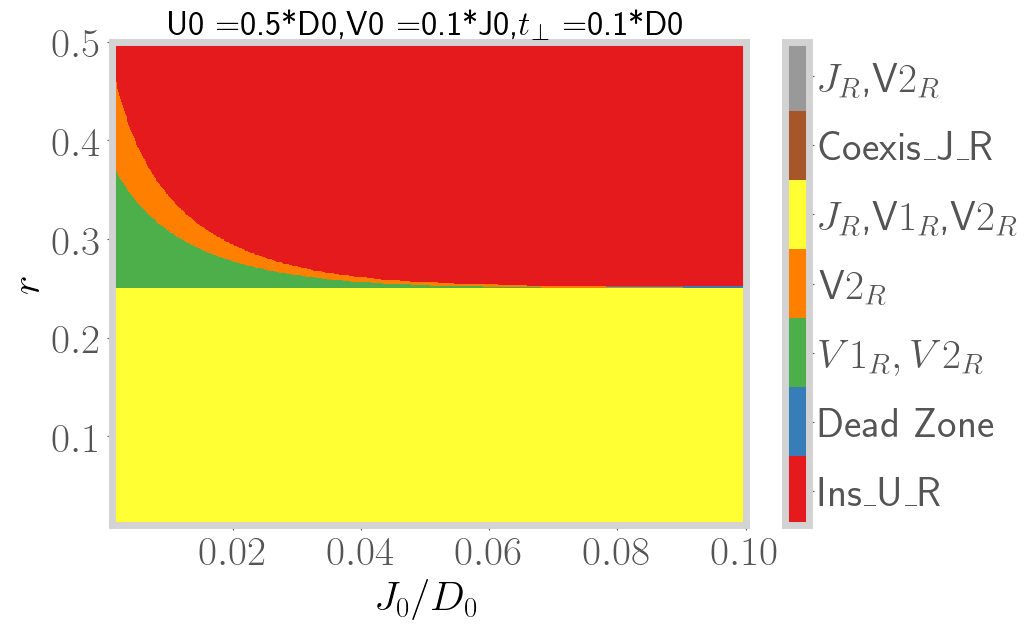

In [20]:

##### With two U_b,two J,two V when omega is fixed





import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.style.use('ggplot')
cols = [p['color'] for p in plt.rcParams['axes.prop_cycle']]
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{braket}\usepackage{nicefrac}')
plt.rcParams.update({'font.size': 30,
                     'figure.figsize': (11,7),
                     'axes.facecolor': 'white',
                     'axes.edgecolor': 'lightgray',
                     "figure.autolayout": 'True',
                     'axes.xmargin': 0.03,
                     'axes.ymargin': 0.05,
                     'axes.grid': False,
                     'axes.linewidth': 5,
                     'lines.markersize': 10,
                     'text.usetex': True,
                     'lines.linewidth': 8,
                     "legend.frameon": True,
                     "legend.framealpha": 0.7,
                     "legend.handletextpad": 1,
                     "legend.edgecolor": "gray",
                     "legend.handlelength": 1,
                     "legend.labelspacing": 0,
                     "legend.columnspacing": 1,
                     "legend.fontsize": 35,
                    })
linestyles = ["-", "--", ":"]






from time import sleep
import numpy as np
import matplotlib.pyplot as plt
import sys
from matplotlib import colors
from multiprocessing import Pool
from tqdm import tqdm


def RG_flow(J0,U0,D0,t,V10,V20,U_b,d):
    J = [J0]
    V1 = [V10]
    V2 = [V20]
    U = [U0]
    D = [D0]
    d_0_int = D[0]-(J[0]/4) - (U_b/4)
    d_0_int1 = d_0_int - (U[0]/2)
    d_0_int2  = d_0_int + (J[0]/4) + (U[0]/2)
    d_0_int3  = d_0_int + (J[0]/4)
    flag_J = True
    flag_V1 = True
    flag_V2 = True
    flag_U = True
    dens = []
    A1 = 0
    A2 = 0
    B1 = 0
    B2 = 0
    C1 = 0
    C2 = 0
    D1 = 0
    D2 = 0
    # print (J0,U_b,"---")
    while D[-1] > 0:
        d_0=D[0]/2 + D[-1]/2-(J[-1]/4)  - (U_b/4)
        
        A1 = 1/(d_0 - t) if (d_0 - t) * (d_0_int - t) > 0 else 0
        A2 = 1/(d_0 + t) if (d_0 + t) * (d_0_int + t) > 0 else 0
         
        B1 = 1/(d_0 - (U[-1]/2) - t) if (d_0 - (U[-1]/2) - t) * (d_0_int1 - t)  > 0 else 0
        B2 = 1/(d_0 - (U[-1]/2) + t) if (d_0 - (U[-1]/2) + t) * (d_0_int1 + t)  > 0 else 0
        
        C1 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) - t ) if (d_0 + (J[-1]/4) + (U[-1]/2) - t) * (d_0_int2 - t) > 0 else 0
        C2 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) + t ) if (d_0 + (J[-1]/4) + (U[-1]/2) + t) * (d_0_int2 + t) > 0 else 0
        
        D1 = 1/(d_0 + (J[-1]/4) - t ) if (d_0 + (J[-1]/4) - t) * (d_0_int3 - t) > 0 else 0
        D2 = 1/(d_0 + (J[-1]/4) + t ) if (d_0 + (J[-1]/4) + t) * (d_0_int3 + t) > 0 else 0
            
        delta_J = J[-1]*(J[-1] + 4*U_b)*(A1 + A2)*0.5*d
        
        if (J[-1] + delta_J) * J[-1] > 0 and flag_J:
            J.append(J[-1] + delta_J)
        else :
            flag_J =False
            J.append(0)
            
        delta_V_1_1 = ((3*J[-1]*V1[-1])/8)*(A2 + B2)*d 
        delta_V_1_2 = ((V1[-1] * U_b)/2)*(C1 + D1 + B2 + A2)*d
        delta_V_1 =  delta_V_1_1 + delta_V_1_2 
        
            
        if (V1[-1] + delta_V_1) * V1[-1] > 0 and flag_V1:
            V1.append(min(V1[-1] + delta_V_1,10**120))
        else :
            V1.append(0)
            flag_V1 = False
        #print(A2,B2,V1[-1])
        delta_V_2_1 = ((3*J[-1]*V2[-1])/8)*(A1 + B1)*d 
        delta_V_2_2 = ((V2[-1] * U_b)/2)*(C2 + D2 + B1 + A1)*d
        delta_V_2 =  delta_V_2_1 + delta_V_2_2 
        
        if (V2[-1] + delta_V_2) * V2[-1] > 0 and flag_V2:
            V2.append(min(V2[-1] + delta_V_2,10**120))
        else :
            V2.append(0)
            flag_V2 = False
            
            
        delta_U = (4*(V1[-1]**2 + V2[-1]**2)*(C1 + C2 - B1 - B2)+ J[-1]**2*(A1 + A2))* d
        
        
    
        if (U[-1] + delta_U) * U[-1] > 0 and flag_U:
            U.append(U[-1] + delta_U)
        else :
            U.append(0)
            flag_U = False
        D.append(D[-1]-d)
        
    return V1, V2, J, U, D
    
def RG(y,r,U0,D0,t,V_by_J,d=0.01):
    W = []
    
    for r_i in tqdm(r):
        W.append([])
        for J0 in y :
            V10 = J0*V_by_J
            V20 = J0*V_by_J
            U_b = r_i * J0
            V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
            
            if J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 > 0.3:
                flag = 0
            elif J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 < 0.3:
                #print (J0, V10, V20, U0, U_b, J[-1]/J0, V1[-1]/V10, V2[-1]/V20, U[-1]/U0)
                flag = 1
            elif J[-1]/J0 < 1  and V1[-1]/V10 > 1  and V2[-1]/V20 > 1:
                flag = 2
            elif J[-1]/J0 < 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 3
            elif J[-1]/J0 > 1  and V1[-1]/V10 > 1 and V2[-1]/V20 > 1:
                flag = 4
            elif J[-1]/J0 > 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1:
                flag = 5
                # print (J[-1]/J0, V[-1]/V0)
                # print (dens)
            elif J[-1]/J0 > 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 6
            W[-1].append(flag)
            
    
    
    
    cmap = plt.cm.Set1
    norm = colors.BoundaryNorm(np.arange(-0.5, 7, 1), cmap.N)
    im1 = plt.imshow(W, origin='lower', cmap=cmap, norm=norm, aspect = "auto",extent=(min(y)/D0, max(y)/D0, min(abs(r)), max(abs(r))),interpolation="None")
    colorbar = plt.colorbar(ticks=np.linspace(0, 6, 7))
    colorbar.set_ticklabels(['Ins_U_R', 'Dead Zone','$V1_R,V2_R$','V$2_R$','$J_{R}$,V$1_{R}$,V$2_{R}$','Coexis_J_R', '$J_{R}$,V$2_{R}$'])
    plt.ylabel('$r$')
    plt.xlabel('$J_{0}/D_0$')
    plt.title('U0 ={U0}*D0,V0 ={V_by_J}*J0,$t_\perp$ ={t}*D0'.format(U0= U0/D0,V_by_J =V_by_J,t =t/D0),fontsize='small')
    #plt.yscale('log')
    plt.savefig("U_0*D_0 ={U0},V_0 ={V_by_J}*J0,t*D0 ={t}.pdf".format(U0= U0,V_by_J =V_by_J,t =t), bbox_inches='tight')
    plt.savefig("U_0*D_0 ={U0},V_0 ={V_by_J}*J0,t*D0 ={t}.png".format(U0= U0,V_by_J =V_by_J,t =t), bbox_inches='tight')
    plt.show()

D0 = 100
U0 = 0.5 * D0
#y = 10**np.linspace(-1,0, 40) * D0
y = np.linspace(0.001, 0.1, 700) * D0
#print(y)
#x = np.linspace(0.001, 2, 10) * D0
V_by_J = 0.1
#r = -10**np.linspace(-1,1, 40) 
r = -np.linspace(0.01,0.5,700) 
t = 0.1 * D0
RG(y,r,U0,D0,t,V_by_J,d=0.05)

# Semielliptical DOS

In [ ]:

##### With two U_b,two J,two V when omega is fixed





import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.style.use('ggplot')
cols = [p['color'] for p in plt.rcParams['axes.prop_cycle']]
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{braket}\usepackage{nicefrac}')
plt.rcParams.update({'font.size': 30,
                     'figure.figsize': (11,7),
                     'axes.facecolor': 'white',
                     'axes.edgecolor': 'lightgray',
                     "figure.autolayout": 'True',
                     'axes.xmargin': 0.03,
                     'axes.ymargin': 0.05,
                     'axes.grid': False,
                     'axes.linewidth': 5,
                     'lines.markersize': 10,
                     'text.usetex': True,
                     'lines.linewidth': 8,
                     "legend.frameon": True,
                     "legend.framealpha": 0.7,
                     "legend.handletextpad": 1,
                     "legend.edgecolor": "gray",
                     "legend.handlelength": 1,
                     "legend.labelspacing": 0,
                     "legend.columnspacing": 1,
                     "legend.fontsize": 35,
                    })
linestyles = ["-", "--", ":"]






from time import sleep
import numpy as np
import matplotlib.pyplot as plt
import sys
from matplotlib import colors
from multiprocessing import Pool
from tqdm import tqdm


def RG_flow(J0,U0,D0,t,V10,V20,U_b,d):
    J = [J0]
    V1 = [V10]
    V2 = [V20]
    U = [U0]
    D = [D0]
    d_0_int = D[0]-(J[0]/4) - (U_b/4)
    d_0_int1 = d_0_int - (U[0]/2)
    d_0_int2  = d_0_int + (J[0]/4) + (U[0]/2)
    d_0_int3  = d_0_int + (J[0]/4)
    flag_J = True
    flag_V1 = True
    flag_V2 = True
    flag_U = True
    dens = []
    A1 = 0
    A2 = 0
    B1 = 0
    B2 = 0
    C1 = 0
    C2 = 0
    D1 = 0
    D2 = 0
    # print (J0,U_b,"---")
    while D[-1] > 0:
        d_0=D[0]/2 + D[-1]/2-(J[-1]/4)  - (U_b/4)
        
        A1 = 1/(d_0 - t) if (d_0 - t) * (d_0_int - t) > 0 else 0
        A2 = 1/(d_0 + t) if (d_0 + t) * (d_0_int + t) > 0 else 0
         
        B1 = 1/(d_0 - (U[-1]/2) - t) if (d_0 - (U[-1]/2) - t) * (d_0_int1 - t)  > 0 else 0
        B2 = 1/(d_0 - (U[-1]/2) + t) if (d_0 - (U[-1]/2) + t) * (d_0_int1 + t)  > 0 else 0
        
        C1 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) - t ) if (d_0 + (J[-1]/4) + (U[-1]/2) - t) * (d_0_int2 - t) > 0 else 0
        C2 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) + t ) if (d_0 + (J[-1]/4) + (U[-1]/2) + t) * (d_0_int2 + t) > 0 else 0
        
        D1 = 1/(d_0 + (J[-1]/4) - t ) if (d_0 + (J[-1]/4) - t) * (d_0_int3 - t) > 0 else 0
        D2 = 1/(d_0 + (J[-1]/4) + t ) if (d_0 + (J[-1]/4) + t) * (d_0_int3 + t) > 0 else 0
            
        delta_J = J[-1]*(J[-1] + 4*U_b)*(A1 + A2)*0.5*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        
        if (J[-1] + delta_J) * J[-1] > 0 and flag_J:
            J.append(J[-1] + delta_J)
        else :
            flag_J =False
            J.append(0)
            
        delta_V_1_1 = ((3*J[-1]*V1[-1])/8)*(A2 + B2)*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        delta_V_1 =  delta_V_1_1
        
            
        if (V1[-1] + delta_V_1) * V1[-1] > 0 and flag_V1:
            V1.append(min(V1[-1] + delta_V_1,10**120))
        else :
            V1.append(0)
            flag_V1 = False
        #print(A2,B2,V1[-1])
        delta_V_2_1 = ((3*J[-1]*V2[-1])/8)*(A1 + B1)*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        delta_V_2 =  delta_V_2_1 + delta_V_2_2 
        
        if (V2[-1] + delta_V_2) * V2[-1] > 0 and flag_V2:
            V2.append(min(V2[-1] + delta_V_2,10**120))
        else :
            V2.append(0)
            flag_V2 = False
            
            
        delta_U = (4*(V1[-1]**2 + V2[-1]**2)*(C1 + C2 - B1 - B2)+ J[-1]**2*(A1 + A2))* d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        
    
        if (U[-1] + delta_U) * U[-1] > 0 and flag_U:
            U.append(U[-1] + delta_U)
        else :
            U.append(0)
            flag_U = False
        D.append(D[-1]-d)
        
    return V1, V2, J, U, D
    
def RG(y,r,U0,D0,t,V_by_J,d=0.01):
    W = []
    
    for r_i in tqdm(r):
        W.append([])
        for J0 in y :
            V10 = J0*V_by_J
            V20 = J0*V_by_J
            U_b = r_i * J0
            V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
            
            if J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 > 0.3:
                flag = 0
            elif J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 < 0.3:
                #print (J0, V10, V20, U0, U_b, J[-1]/J0, V1[-1]/V10, V2[-1]/V20, U[-1]/U0)
                flag = 1
            elif J[-1]/J0 < 1  and V1[-1]/V10 > 1  and V2[-1]/V20 > 1:
                flag = 2
            elif J[-1]/J0 < 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 3
            elif J[-1]/J0 > 1  and V1[-1]/V10 > 1 and V2[-1]/V20 > 1:
                flag = 4
            elif J[-1]/J0 > 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1:
                flag = 5
                # print (J[-1]/J0, V[-1]/V0)
                # print (dens)
            elif J[-1]/J0 > 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 6
            W[-1].append(flag)
            
    
    
    
    cmap = plt.cm.Set1
    norm = colors.BoundaryNorm(np.arange(-0.5, 7, 1), cmap.N)
    im1 = plt.imshow(W, origin='lower', cmap=cmap, norm=norm, aspect = "auto",extent=(min(y)/D0, max(y)/D0, min(abs(r)), max(abs(r))),interpolation="None")
    colorbar = plt.colorbar(ticks=np.linspace(0, 6, 7))
    colorbar.set_ticklabels(['Ins_U_R', 'Dead Zone','$V1_R,V2_R$','V$2_R$','$J_{R}$,V$1_{R}$,V$2_{R}$','Coexis_J_R', '$J_{R}$,V$2_{R}$'])
    plt.ylabel('$r$')
    plt.xlabel('$J_{0}/D_0$')
    plt.title(r'$U_0$ ={U0}*$D_0$,$V_0$ ={V_by_J}*$J_0$,$t_\perp$ ={t}*$D_0$'.format(U0= U0/D0,V_by_J =V_by_J,t =t/D0),fontsize='small')
    #plt.yscale('log')
    plt.savefig("Sr-U_0*D_0 ={U0},V_0 ={V_by_J}*J0,t*D0 ={t}.pdf".format(U0= U0,V_by_J =V_by_J,t =t), bbox_inches='tight')
    plt.savefig("Sr-U_0*D_0 ={U0},V_0 ={V_by_J}*J0,t*D0 ={t}.png".format(U0= U0,V_by_J =V_by_J,t =t), bbox_inches='tight')
    plt.show()

D0 = 100
U0 = 0.1 * D0
#y = 10**np.linspace(-1,0, 40) * D0
y = np.linspace(0.001, 1, 200) * D0
#print(y)
#x = np.linspace(0.001, 2, 10) * D0
V_by_J = 0.1
#r = -10**np.linspace(-1,1, 40) 
r = -np.linspace(0.01,1,200) 
t = 0.1 * D0
RG(y,r,U0,D0,t,V_by_J,d=0.05)

100%|█████████████████████████████████████████| 200/200 [28:07<00:00,  8.44s/it]


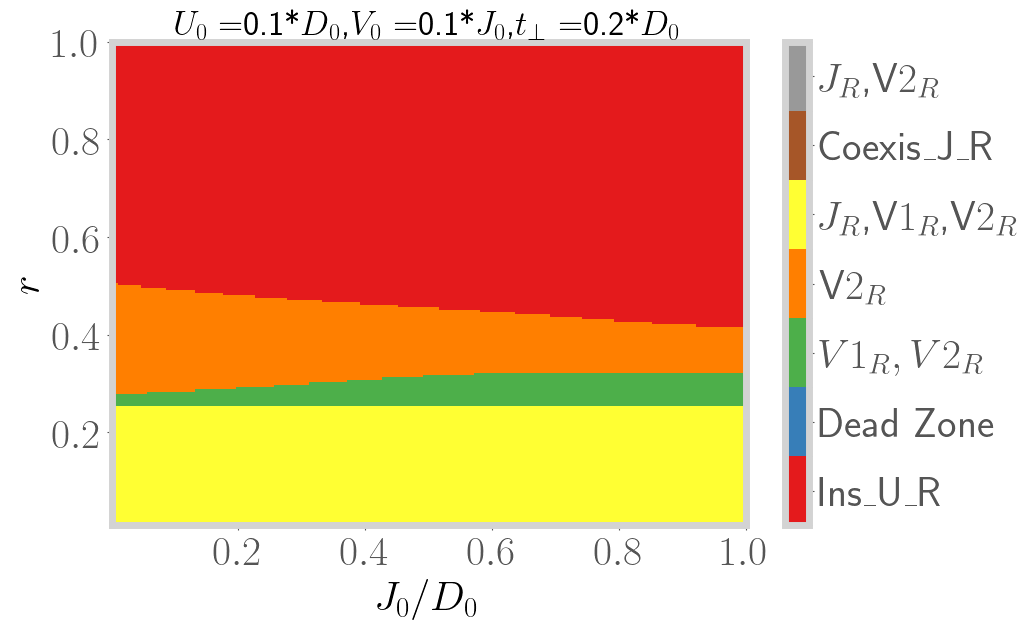

In [17]:

##### With two U_b,two J,two V when omega is fixed





import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.style.use('ggplot')
cols = [p['color'] for p in plt.rcParams['axes.prop_cycle']]
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{braket}\usepackage{nicefrac}')
plt.rcParams.update({'font.size': 30,
                     'figure.figsize': (11,7),
                     'axes.facecolor': 'white',
                     'axes.edgecolor': 'lightgray',
                     "figure.autolayout": 'True',
                     'axes.xmargin': 0.03,
                     'axes.ymargin': 0.05,
                     'axes.grid': False,
                     'axes.linewidth': 5,
                     'lines.markersize': 10,
                     'text.usetex': True,
                     'lines.linewidth': 8,
                     "legend.frameon": True,
                     "legend.framealpha": 0.7,
                     "legend.handletextpad": 1,
                     "legend.edgecolor": "gray",
                     "legend.handlelength": 1,
                     "legend.labelspacing": 0,
                     "legend.columnspacing": 1,
                     "legend.fontsize": 35,
                    })
linestyles = ["-", "--", ":"]






from time import sleep
import numpy as np
import matplotlib.pyplot as plt
import sys
from matplotlib import colors
from multiprocessing import Pool
from tqdm import tqdm


def RG_flow(J0,U0,D0,t,V10,V20,U_b,d):
    J = [J0]
    V1 = [V10]
    V2 = [V20]
    U = [U0]
    D = [D0]
    d_0_int = D[0]-(J[0]/4) - (U_b/4)
    d_0_int1 = d_0_int - (U[0]/2)
    d_0_int2  = d_0_int + (J[0]/4) + (U[0]/2)
    d_0_int3  = d_0_int + (J[0]/4)
    flag_J = True
    flag_V1 = True
    flag_V2 = True
    flag_U = True
    dens = []
    A1 = 0
    A2 = 0
    B1 = 0
    B2 = 0
    C1 = 0
    C2 = 0
    D1 = 0
    D2 = 0
    # print (J0,U_b,"---")
    while D[-1] > 0:
        d_0=D[0]/2 + D[-1]/2-(J[-1]/4)  - (U_b/4)
        
        A1 = 1/(d_0 - t) if (d_0 - t) * (d_0_int - t) > 0 else 0
        A2 = 1/(d_0 + t) if (d_0 + t) * (d_0_int + t) > 0 else 0
         
        B1 = 1/(d_0 - (U[-1]/2) - t) if (d_0 - (U[-1]/2) - t) * (d_0_int1 - t)  > 0 else 0
        B2 = 1/(d_0 - (U[-1]/2) + t) if (d_0 - (U[-1]/2) + t) * (d_0_int1 + t)  > 0 else 0
        
        C1 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) - t ) if (d_0 + (J[-1]/4) + (U[-1]/2) - t) * (d_0_int2 - t) > 0 else 0
        C2 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) + t ) if (d_0 + (J[-1]/4) + (U[-1]/2) + t) * (d_0_int2 + t) > 0 else 0
        
        D1 = 1/(d_0 + (J[-1]/4) - t ) if (d_0 + (J[-1]/4) - t) * (d_0_int3 - t) > 0 else 0
        D2 = 1/(d_0 + (J[-1]/4) + t ) if (d_0 + (J[-1]/4) + t) * (d_0_int3 + t) > 0 else 0
            
        delta_J = J[-1]*(J[-1] + 4*U_b)*(A1 + A2)*0.5*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        
        if (J[-1] + delta_J) * J[-1] > 0 and flag_J:
            J.append(J[-1] + delta_J)
        else :
            flag_J =False
            J.append(0)
            
        delta_V_1_1 = ((3*J[-1]*V1[-1])/8)*(A2 + B2)*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        delta_V_1_2 = ((V1[-1] * U_b)/2)*(C1 + D1 + B2 + A2)*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        delta_V_1 =  delta_V_1_1 + delta_V_1_2 
        
            
        if (V1[-1] + delta_V_1) * V1[-1] > 0 and flag_V1:
            V1.append(min(V1[-1] + delta_V_1,10**120))
        else :
            V1.append(0)
            flag_V1 = False
        #print(A2,B2,V1[-1])
        delta_V_2_1 = ((3*J[-1]*V2[-1])/8)*(A1 + B1)*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        delta_V_2_2 = ((V2[-1] * U_b)/2)*(C2 + D2 + B1 + A1)*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        delta_V_2 =  delta_V_2_1 + delta_V_2_2 
        
        if (V2[-1] + delta_V_2) * V2[-1] > 0 and flag_V2:
            V2.append(min(V2[-1] + delta_V_2,10**120))
        else :
            V2.append(0)
            flag_V2 = False
            
            
        delta_U = (4*(V1[-1]**2 + V2[-1]**2)*(C1 + C2 - B1 - B2)+ J[-1]**2*(A1 + A2))* d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        
    
        if (U[-1] + delta_U) * U[-1] > 0 and flag_U:
            U.append(U[-1] + delta_U)
        else :
            U.append(0)
            flag_U = False
        D.append(D[-1]-d)
        
    return V1, V2, J, U, D
    
def RG(y,r,U0,D0,t,V_by_J,d=0.01):
    W = []
    
    for r_i in tqdm(r):
        W.append([])
        for J0 in y :
            V10 = J0*V_by_J
            V20 = J0*V_by_J
            U_b = r_i * J0
            V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
            
            if J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 > 0.3:
                flag = 0
            elif J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 < 0.3:
                #print (J0, V10, V20, U0, U_b, J[-1]/J0, V1[-1]/V10, V2[-1]/V20, U[-1]/U0)
                flag = 1
            elif J[-1]/J0 < 1  and V1[-1]/V10 > 1  and V2[-1]/V20 > 1:
                flag = 2
            elif J[-1]/J0 < 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 3
            elif J[-1]/J0 > 1  and V1[-1]/V10 > 1 and V2[-1]/V20 > 1:
                flag = 4
            elif J[-1]/J0 > 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1:
                flag = 5
                # print (J[-1]/J0, V[-1]/V0)
                # print (dens)
            elif J[-1]/J0 > 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 6
            W[-1].append(flag)
            
    
    
    
    cmap = plt.cm.Set1
    norm = colors.BoundaryNorm(np.arange(-0.5, 7, 1), cmap.N)
    im1 = plt.imshow(W, origin='lower', cmap=cmap, norm=norm, aspect = "auto",extent=(min(y)/D0, max(y)/D0, min(abs(r)), max(abs(r))),interpolation="None")
    colorbar = plt.colorbar(ticks=np.linspace(0, 6, 7))
    colorbar.set_ticklabels(['Ins_U_R', 'Dead Zone','$V1_R,V2_R$','V$2_R$','$J_{R}$,V$1_{R}$,V$2_{R}$','Coexis_J_R', '$J_{R}$,V$2_{R}$'])
    plt.ylabel('$r$')
    plt.xlabel('$J_{0}/D_0$')
    plt.title(r'$U_0$ ={U0}*$D_0$,$V_0$ ={V_by_J}*$J_0$,$t_\perp$ ={t}*$D_0$'.format(U0= U0/D0,V_by_J =V_by_J,t =t/D0),fontsize='small')
    #plt.yscale('log')
    plt.savefig("Sr-U_0*D_0 ={U0},V_0 ={V_by_J}*J0,t*D0 ={t}.pdf".format(U0= U0,V_by_J =V_by_J,t =t), bbox_inches='tight')
    plt.savefig("Sr-U_0*D_0 ={U0},V_0 ={V_by_J}*J0,t*D0 ={t}.png".format(U0= U0,V_by_J =V_by_J,t =t), bbox_inches='tight')
    plt.show()

D0 = 100
U0 = 0.1 * D0
#y = 10**np.linspace(-1,0, 40) * D0
y = np.linspace(0.001, 1, 200) * D0
#print(y)
#x = np.linspace(0.001, 2, 10) * D0
V_by_J = 0.1
#r = -10**np.linspace(-1,1, 40) 
r = -np.linspace(0.01,1,200) 
t = 0.2 * D0
RG(y,r,U0,D0,t,V_by_J,d=0.05)

100%|█████████████████████████████████████████| 200/200 [28:35<00:00,  8.58s/it]


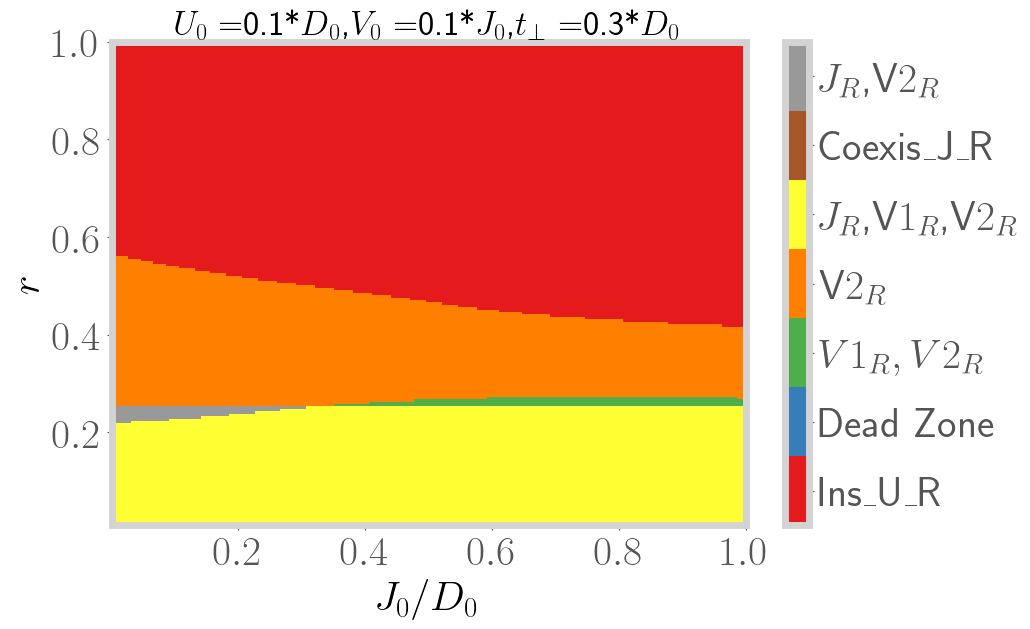

In [18]:

##### With two U_b,two J,two V when omega is fixed





import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.style.use('ggplot')
cols = [p['color'] for p in plt.rcParams['axes.prop_cycle']]
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{braket}\usepackage{nicefrac}')
plt.rcParams.update({'font.size': 30,
                     'figure.figsize': (11,7),
                     'axes.facecolor': 'white',
                     'axes.edgecolor': 'lightgray',
                     "figure.autolayout": 'True',
                     'axes.xmargin': 0.03,
                     'axes.ymargin': 0.05,
                     'axes.grid': False,
                     'axes.linewidth': 5,
                     'lines.markersize': 10,
                     'text.usetex': True,
                     'lines.linewidth': 8,
                     "legend.frameon": True,
                     "legend.framealpha": 0.7,
                     "legend.handletextpad": 1,
                     "legend.edgecolor": "gray",
                     "legend.handlelength": 1,
                     "legend.labelspacing": 0,
                     "legend.columnspacing": 1,
                     "legend.fontsize": 35,
                    })
linestyles = ["-", "--", ":"]






from time import sleep
import numpy as np
import matplotlib.pyplot as plt
import sys
from matplotlib import colors
from multiprocessing import Pool
from tqdm import tqdm


def RG_flow(J0,U0,D0,t,V10,V20,U_b,d):
    J = [J0]
    V1 = [V10]
    V2 = [V20]
    U = [U0]
    D = [D0]
    d_0_int = D[0]-(J[0]/4) - (U_b/4)
    d_0_int1 = d_0_int - (U[0]/2)
    d_0_int2  = d_0_int + (J[0]/4) + (U[0]/2)
    d_0_int3  = d_0_int + (J[0]/4)
    flag_J = True
    flag_V1 = True
    flag_V2 = True
    flag_U = True
    dens = []
    A1 = 0
    A2 = 0
    B1 = 0
    B2 = 0
    C1 = 0
    C2 = 0
    D1 = 0
    D2 = 0
    # print (J0,U_b,"---")
    while D[-1] > 0:
        d_0=D[0]/2 + D[-1]/2-(J[-1]/4)  - (U_b/4)
        
        A1 = 1/(d_0 - t) if (d_0 - t) * (d_0_int - t) > 0 else 0
        A2 = 1/(d_0 + t) if (d_0 + t) * (d_0_int + t) > 0 else 0
         
        B1 = 1/(d_0 - (U[-1]/2) - t) if (d_0 - (U[-1]/2) - t) * (d_0_int1 - t)  > 0 else 0
        B2 = 1/(d_0 - (U[-1]/2) + t) if (d_0 - (U[-1]/2) + t) * (d_0_int1 + t)  > 0 else 0
        
        C1 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) - t ) if (d_0 + (J[-1]/4) + (U[-1]/2) - t) * (d_0_int2 - t) > 0 else 0
        C2 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) + t ) if (d_0 + (J[-1]/4) + (U[-1]/2) + t) * (d_0_int2 + t) > 0 else 0
        
        D1 = 1/(d_0 + (J[-1]/4) - t ) if (d_0 + (J[-1]/4) - t) * (d_0_int3 - t) > 0 else 0
        D2 = 1/(d_0 + (J[-1]/4) + t ) if (d_0 + (J[-1]/4) + t) * (d_0_int3 + t) > 0 else 0
            
        delta_J = J[-1]*(J[-1] + 4*U_b)*(A1 + A2)*0.5*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        
        if (J[-1] + delta_J) * J[-1] > 0 and flag_J:
            J.append(J[-1] + delta_J)
        else :
            flag_J =False
            J.append(0)
            
        delta_V_1_1 = ((3*J[-1]*V1[-1])/8)*(A2 + B2)*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        delta_V_1_2 = ((V1[-1] * U_b)/2)*(C1 + D1 + B2 + A2)*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        delta_V_1 =  delta_V_1_1 + delta_V_1_2 
        
            
        if (V1[-1] + delta_V_1) * V1[-1] > 0 and flag_V1:
            V1.append(min(V1[-1] + delta_V_1,10**120))
        else :
            V1.append(0)
            flag_V1 = False
        #print(A2,B2,V1[-1])
        delta_V_2_1 = ((3*J[-1]*V2[-1])/8)*(A1 + B1)*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        delta_V_2_2 = ((V2[-1] * U_b)/2)*(C2 + D2 + B1 + A1)*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        delta_V_2 =  delta_V_2_1 + delta_V_2_2 
        
        if (V2[-1] + delta_V_2) * V2[-1] > 0 and flag_V2:
            V2.append(min(V2[-1] + delta_V_2,10**120))
        else :
            V2.append(0)
            flag_V2 = False
            
            
        delta_U = (4*(V1[-1]**2 + V2[-1]**2)*(C1 + C2 - B1 - B2)+ J[-1]**2*(A1 + A2))* d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        
    
        if (U[-1] + delta_U) * U[-1] > 0 and flag_U:
            U.append(U[-1] + delta_U)
        else :
            U.append(0)
            flag_U = False
        D.append(D[-1]-d)
        
    return V1, V2, J, U, D
    
def RG(y,r,U0,D0,t,V_by_J,d=0.01):
    W = []
    
    for r_i in tqdm(r):
        W.append([])
        for J0 in y :
            V10 = J0*V_by_J
            V20 = J0*V_by_J
            U_b = r_i * J0
            V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
            
            if J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 > 0.3:
                flag = 0
            elif J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 < 0.3:
                #print (J0, V10, V20, U0, U_b, J[-1]/J0, V1[-1]/V10, V2[-1]/V20, U[-1]/U0)
                flag = 1
            elif J[-1]/J0 < 1  and V1[-1]/V10 > 1  and V2[-1]/V20 > 1:
                flag = 2
            elif J[-1]/J0 < 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 3
            elif J[-1]/J0 > 1  and V1[-1]/V10 > 1 and V2[-1]/V20 > 1:
                flag = 4
            elif J[-1]/J0 > 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1:
                flag = 5
                # print (J[-1]/J0, V[-1]/V0)
                # print (dens)
            elif J[-1]/J0 > 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 6
            W[-1].append(flag)
            
    
    
    
    cmap = plt.cm.Set1
    norm = colors.BoundaryNorm(np.arange(-0.5, 7, 1), cmap.N)
    im1 = plt.imshow(W, origin='lower', cmap=cmap, norm=norm, aspect = "auto",extent=(min(y)/D0, max(y)/D0, min(abs(r)), max(abs(r))),interpolation="None")
    colorbar = plt.colorbar(ticks=np.linspace(0, 6, 7))
    colorbar.set_ticklabels(['Ins_U_R', 'Dead Zone','$V1_R,V2_R$','V$2_R$','$J_{R}$,V$1_{R}$,V$2_{R}$','Coexis_J_R', '$J_{R}$,V$2_{R}$'])
    plt.ylabel('$r$')
    plt.xlabel('$J_{0}/D_0$')
    plt.title(r'$U_0$ ={U0}*$D_0$,$V_0$ ={V_by_J}*$J_0$,$t_\perp$ ={t}*$D_0$'.format(U0= U0/D0,V_by_J =V_by_J,t =t/D0),fontsize='small')
    #plt.yscale('log')
    plt.savefig("Sr-U_0*D_0 ={U0},V_0 ={V_by_J}*J0,t*D0 ={t}.pdf".format(U0= U0,V_by_J =V_by_J,t =t), bbox_inches='tight')
    plt.savefig("Sr-U_0*D_0 ={U0},V_0 ={V_by_J}*J0,t*D0 ={t}.png".format(U0= U0,V_by_J =V_by_J,t =t), bbox_inches='tight')
    plt.show()

D0 = 100
U0 = 0.1 * D0
#y = 10**np.linspace(-1,0, 40) * D0
y = np.linspace(0.001, 1, 200) * D0
#print(y)
#x = np.linspace(0.001, 2, 10) * D0
V_by_J = 0.1
#r = -10**np.linspace(-1,1, 40) 
r = -np.linspace(0.01,1,200) 
t = 0.3 * D0
RG(y,r,U0,D0,t,V_by_J,d=0.05)

100%|█████████████████████████████████████████| 200/200 [29:16<00:00,  8.78s/it]


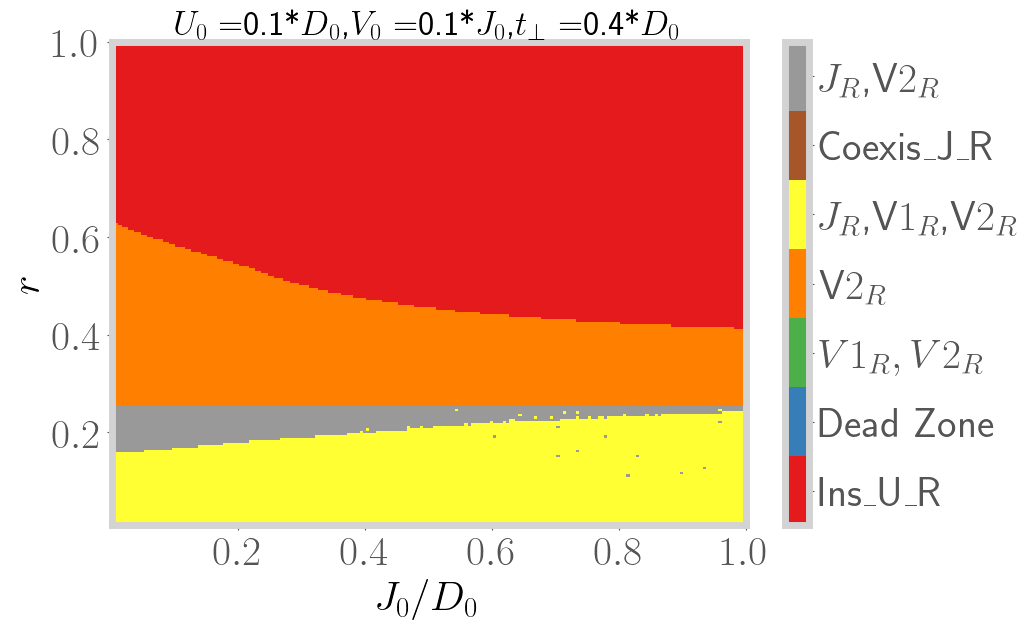

In [19]:

##### With two U_b,two J,two V when omega is fixed





import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.style.use('ggplot')
cols = [p['color'] for p in plt.rcParams['axes.prop_cycle']]
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{braket}\usepackage{nicefrac}')
plt.rcParams.update({'font.size': 30,
                     'figure.figsize': (11,7),
                     'axes.facecolor': 'white',
                     'axes.edgecolor': 'lightgray',
                     "figure.autolayout": 'True',
                     'axes.xmargin': 0.03,
                     'axes.ymargin': 0.05,
                     'axes.grid': False,
                     'axes.linewidth': 5,
                     'lines.markersize': 10,
                     'text.usetex': True,
                     'lines.linewidth': 8,
                     "legend.frameon": True,
                     "legend.framealpha": 0.7,
                     "legend.handletextpad": 1,
                     "legend.edgecolor": "gray",
                     "legend.handlelength": 1,
                     "legend.labelspacing": 0,
                     "legend.columnspacing": 1,
                     "legend.fontsize": 35,
                    })
linestyles = ["-", "--", ":"]






from time import sleep
import numpy as np
import matplotlib.pyplot as plt
import sys
from matplotlib import colors
from multiprocessing import Pool
from tqdm import tqdm


def RG_flow(J0,U0,D0,t,V10,V20,U_b,d):
    J = [J0]
    V1 = [V10]
    V2 = [V20]
    U = [U0]
    D = [D0]
    d_0_int = D[0]-(J[0]/4) - (U_b/4)
    d_0_int1 = d_0_int - (U[0]/2)
    d_0_int2  = d_0_int + (J[0]/4) + (U[0]/2)
    d_0_int3  = d_0_int + (J[0]/4)
    flag_J = True
    flag_V1 = True
    flag_V2 = True
    flag_U = True
    dens = []
    A1 = 0
    A2 = 0
    B1 = 0
    B2 = 0
    C1 = 0
    C2 = 0
    D1 = 0
    D2 = 0
    # print (J0,U_b,"---")
    while D[-1] > 0:
        d_0=D[0]/2 + D[-1]/2-(J[-1]/4)  - (U_b/4)
        
        A1 = 1/(d_0 - t) if (d_0 - t) * (d_0_int - t) > 0 else 0
        A2 = 1/(d_0 + t) if (d_0 + t) * (d_0_int + t) > 0 else 0
         
        B1 = 1/(d_0 - (U[-1]/2) - t) if (d_0 - (U[-1]/2) - t) * (d_0_int1 - t)  > 0 else 0
        B2 = 1/(d_0 - (U[-1]/2) + t) if (d_0 - (U[-1]/2) + t) * (d_0_int1 + t)  > 0 else 0
        
        C1 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) - t ) if (d_0 + (J[-1]/4) + (U[-1]/2) - t) * (d_0_int2 - t) > 0 else 0
        C2 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) + t ) if (d_0 + (J[-1]/4) + (U[-1]/2) + t) * (d_0_int2 + t) > 0 else 0
        
        D1 = 1/(d_0 + (J[-1]/4) - t ) if (d_0 + (J[-1]/4) - t) * (d_0_int3 - t) > 0 else 0
        D2 = 1/(d_0 + (J[-1]/4) + t ) if (d_0 + (J[-1]/4) + t) * (d_0_int3 + t) > 0 else 0
            
        delta_J = J[-1]*(J[-1] + 4*U_b)*(A1 + A2)*0.5*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        
        if (J[-1] + delta_J) * J[-1] > 0 and flag_J:
            J.append(J[-1] + delta_J)
        else :
            flag_J =False
            J.append(0)
            
        delta_V_1_1 = ((3*J[-1]*V1[-1])/8)*(A2 + B2)*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        delta_V_1_2 = ((V1[-1] * U_b)/2)*(C1 + D1 + B2 + A2)*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        delta_V_1 =  delta_V_1_1 + delta_V_1_2 
        
            
        if (V1[-1] + delta_V_1) * V1[-1] > 0 and flag_V1:
            V1.append(min(V1[-1] + delta_V_1,10**120))
        else :
            V1.append(0)
            flag_V1 = False
        #print(A2,B2,V1[-1])
        delta_V_2_1 = ((3*J[-1]*V2[-1])/8)*(A1 + B1)*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        delta_V_2_2 = ((V2[-1] * U_b)/2)*(C2 + D2 + B1 + A1)*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        delta_V_2 =  delta_V_2_1 + delta_V_2_2 
        
        if (V2[-1] + delta_V_2) * V2[-1] > 0 and flag_V2:
            V2.append(min(V2[-1] + delta_V_2,10**120))
        else :
            V2.append(0)
            flag_V2 = False
            
            
        delta_U = (4*(V1[-1]**2 + V2[-1]**2)*(C1 + C2 - B1 - B2)+ J[-1]**2*(A1 + A2))* d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        
    
        if (U[-1] + delta_U) * U[-1] > 0 and flag_U:
            U.append(U[-1] + delta_U)
        else :
            U.append(0)
            flag_U = False
        D.append(D[-1]-d)
        
    return V1, V2, J, U, D
    
def RG(y,r,U0,D0,t,V_by_J,d=0.01):
    W = []
    
    for r_i in tqdm(r):
        W.append([])
        for J0 in y :
            V10 = J0*V_by_J
            V20 = J0*V_by_J
            U_b = r_i * J0
            V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
            
            if J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 > 0.3:
                flag = 0
            elif J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 < 0.3:
                #print (J0, V10, V20, U0, U_b, J[-1]/J0, V1[-1]/V10, V2[-1]/V20, U[-1]/U0)
                flag = 1
            elif J[-1]/J0 < 1  and V1[-1]/V10 > 1  and V2[-1]/V20 > 1:
                flag = 2
            elif J[-1]/J0 < 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 3
            elif J[-1]/J0 > 1  and V1[-1]/V10 > 1 and V2[-1]/V20 > 1:
                flag = 4
            elif J[-1]/J0 > 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1:
                flag = 5
                # print (J[-1]/J0, V[-1]/V0)
                # print (dens)
            elif J[-1]/J0 > 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 6
            W[-1].append(flag)
            
    
    
    
    cmap = plt.cm.Set1
    norm = colors.BoundaryNorm(np.arange(-0.5, 7, 1), cmap.N)
    im1 = plt.imshow(W, origin='lower', cmap=cmap, norm=norm, aspect = "auto",extent=(min(y)/D0, max(y)/D0, min(abs(r)), max(abs(r))),interpolation="None")
    colorbar = plt.colorbar(ticks=np.linspace(0, 6, 7))
    colorbar.set_ticklabels(['Ins_U_R', 'Dead Zone','$V1_R,V2_R$','V$2_R$','$J_{R}$,V$1_{R}$,V$2_{R}$','Coexis_J_R', '$J_{R}$,V$2_{R}$'])
    plt.ylabel('$r$')
    plt.xlabel('$J_{0}/D_0$')
    plt.title(r'$U_0$ ={U0}*$D_0$,$V_0$ ={V_by_J}*$J_0$,$t_\perp$ ={t}*$D_0$'.format(U0= U0/D0,V_by_J =V_by_J,t =t/D0),fontsize='small')
    #plt.yscale('log')
    plt.savefig("Sr-U_0*D_0 ={U0},V_0 ={V_by_J}*J0,t*D0 ={t}.pdf".format(U0= U0,V_by_J =V_by_J,t =t), bbox_inches='tight')
    plt.savefig("Sr-U_0*D_0 ={U0},V_0 ={V_by_J}*J0,t*D0 ={t}.png".format(U0= U0,V_by_J =V_by_J,t =t), bbox_inches='tight')
    plt.show()

D0 = 100
U0 = 0.1 * D0
#y = 10**np.linspace(-1,0, 40) * D0
y = np.linspace(0.001, 1, 200) * D0
#print(y)
#x = np.linspace(0.001, 2, 10) * D0
V_by_J = 0.1
#r = -10**np.linspace(-1,1, 40) 
r = -np.linspace(0.01,1,200) 
t = 0.4 * D0
RG(y,r,U0,D0,t,V_by_J,d=0.05)

100%|█████████████████████████████████████████| 200/200 [27:48<00:00,  8.34s/it]


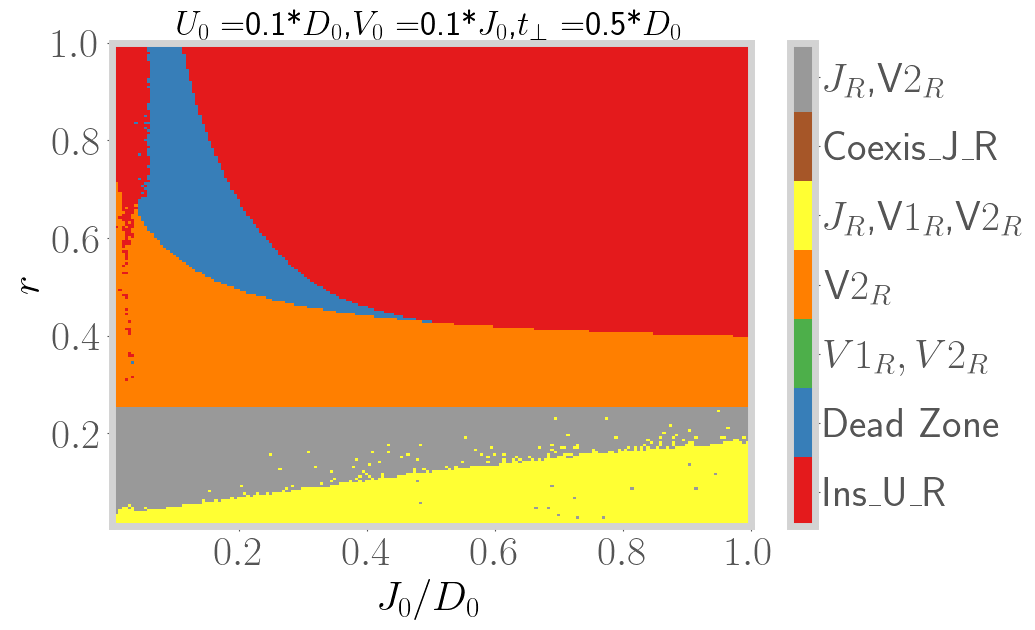

In [20]:

##### With two U_b,two J,two V when omega is fixed





import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.style.use('ggplot')
cols = [p['color'] for p in plt.rcParams['axes.prop_cycle']]
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{braket}\usepackage{nicefrac}')
plt.rcParams.update({'font.size': 30,
                     'figure.figsize': (11,7),
                     'axes.facecolor': 'white',
                     'axes.edgecolor': 'lightgray',
                     "figure.autolayout": 'True',
                     'axes.xmargin': 0.03,
                     'axes.ymargin': 0.05,
                     'axes.grid': False,
                     'axes.linewidth': 5,
                     'lines.markersize': 10,
                     'text.usetex': True,
                     'lines.linewidth': 8,
                     "legend.frameon": True,
                     "legend.framealpha": 0.7,
                     "legend.handletextpad": 1,
                     "legend.edgecolor": "gray",
                     "legend.handlelength": 1,
                     "legend.labelspacing": 0,
                     "legend.columnspacing": 1,
                     "legend.fontsize": 35,
                    })
linestyles = ["-", "--", ":"]






from time import sleep
import numpy as np
import matplotlib.pyplot as plt
import sys
from matplotlib import colors
from multiprocessing import Pool
from tqdm import tqdm


def RG_flow(J0,U0,D0,t,V10,V20,U_b,d):
    J = [J0]
    V1 = [V10]
    V2 = [V20]
    U = [U0]
    D = [D0]
    d_0_int = D[0]-(J[0]/4) - (U_b/4)
    d_0_int1 = d_0_int - (U[0]/2)
    d_0_int2  = d_0_int + (J[0]/4) + (U[0]/2)
    d_0_int3  = d_0_int + (J[0]/4)
    flag_J = True
    flag_V1 = True
    flag_V2 = True
    flag_U = True
    dens = []
    A1 = 0
    A2 = 0
    B1 = 0
    B2 = 0
    C1 = 0
    C2 = 0
    D1 = 0
    D2 = 0
    # print (J0,U_b,"---")
    while D[-1] > 0:
        d_0=D[0]/2 + D[-1]/2-(J[-1]/4)  - (U_b/4)
        
        A1 = 1/(d_0 - t) if (d_0 - t) * (d_0_int - t) > 0 else 0
        A2 = 1/(d_0 + t) if (d_0 + t) * (d_0_int + t) > 0 else 0
         
        B1 = 1/(d_0 - (U[-1]/2) - t) if (d_0 - (U[-1]/2) - t) * (d_0_int1 - t)  > 0 else 0
        B2 = 1/(d_0 - (U[-1]/2) + t) if (d_0 - (U[-1]/2) + t) * (d_0_int1 + t)  > 0 else 0
        
        C1 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) - t ) if (d_0 + (J[-1]/4) + (U[-1]/2) - t) * (d_0_int2 - t) > 0 else 0
        C2 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) + t ) if (d_0 + (J[-1]/4) + (U[-1]/2) + t) * (d_0_int2 + t) > 0 else 0
        
        D1 = 1/(d_0 + (J[-1]/4) - t ) if (d_0 + (J[-1]/4) - t) * (d_0_int3 - t) > 0 else 0
        D2 = 1/(d_0 + (J[-1]/4) + t ) if (d_0 + (J[-1]/4) + t) * (d_0_int3 + t) > 0 else 0
            
        delta_J = J[-1]*(J[-1] + 4*U_b)*(A1 + A2)*0.5*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        
        if (J[-1] + delta_J) * J[-1] > 0 and flag_J:
            J.append(J[-1] + delta_J)
        else :
            flag_J =False
            J.append(0)
            
        delta_V_1_1 = ((3*J[-1]*V1[-1])/8)*(A2 + B2)*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        delta_V_1_2 = ((V1[-1] * U_b)/2)*(C1 + D1 + B2 + A2)*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        delta_V_1 =  delta_V_1_1 + delta_V_1_2 
        
            
        if (V1[-1] + delta_V_1) * V1[-1] > 0 and flag_V1:
            V1.append(min(V1[-1] + delta_V_1,10**120))
        else :
            V1.append(0)
            flag_V1 = False
        #print(A2,B2,V1[-1])
        delta_V_2_1 = ((3*J[-1]*V2[-1])/8)*(A1 + B1)*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        delta_V_2_2 = ((V2[-1] * U_b)/2)*(C2 + D2 + B1 + A1)*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        delta_V_2 =  delta_V_2_1 + delta_V_2_2 
        
        if (V2[-1] + delta_V_2) * V2[-1] > 0 and flag_V2:
            V2.append(min(V2[-1] + delta_V_2,10**120))
        else :
            V2.append(0)
            flag_V2 = False
            
            
        delta_U = (4*(V1[-1]**2 + V2[-1]**2)*(C1 + C2 - B1 - B2)+ J[-1]**2*(A1 + A2))* d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        
    
        if (U[-1] + delta_U) * U[-1] > 0 and flag_U:
            U.append(U[-1] + delta_U)
        else :
            U.append(0)
            flag_U = False
        D.append(D[-1]-d)
        
    return V1, V2, J, U, D
    
def RG(y,r,U0,D0,t,V_by_J,d=0.01):
    W = []
    
    for r_i in tqdm(r):
        W.append([])
        for J0 in y :
            V10 = J0*V_by_J
            V20 = J0*V_by_J
            U_b = r_i * J0
            V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
            
            if J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 > 0.3:
                flag = 0
            elif J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 < 0.3:
                #print (J0, V10, V20, U0, U_b, J[-1]/J0, V1[-1]/V10, V2[-1]/V20, U[-1]/U0)
                flag = 1
            elif J[-1]/J0 < 1  and V1[-1]/V10 > 1  and V2[-1]/V20 > 1:
                flag = 2
            elif J[-1]/J0 < 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 3
            elif J[-1]/J0 > 1  and V1[-1]/V10 > 1 and V2[-1]/V20 > 1:
                flag = 4
            elif J[-1]/J0 > 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1:
                flag = 5
                # print (J[-1]/J0, V[-1]/V0)
                # print (dens)
            elif J[-1]/J0 > 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 6
            W[-1].append(flag)
            
    
    
    
    cmap = plt.cm.Set1
    norm = colors.BoundaryNorm(np.arange(-0.5, 7, 1), cmap.N)
    im1 = plt.imshow(W, origin='lower', cmap=cmap, norm=norm, aspect = "auto",extent=(min(y)/D0, max(y)/D0, min(abs(r)), max(abs(r))),interpolation="None")
    colorbar = plt.colorbar(ticks=np.linspace(0, 6, 7))
    colorbar.set_ticklabels(['Ins_U_R', 'Dead Zone','$V1_R,V2_R$','V$2_R$','$J_{R}$,V$1_{R}$,V$2_{R}$','Coexis_J_R', '$J_{R}$,V$2_{R}$'])
    plt.ylabel('$r$')
    plt.xlabel('$J_{0}/D_0$')
    plt.title(r'$U_0$ ={U0}*$D_0$,$V_0$ ={V_by_J}*$J_0$,$t_\perp$ ={t}*$D_0$'.format(U0= U0/D0,V_by_J =V_by_J,t =t/D0),fontsize='small')
    #plt.yscale('log')
    #plt.savefig("Sr-U_0*D_0 ={U0},V_0 ={V_by_J}*J0,t*D0 ={t}.pdf".format(U0= U0,V_by_J =V_by_J,t =t), bbox_inches='tight')
    #plt.savefig("Sr-U_0*D_0 ={U0},V_0 ={V_by_J}*J0,t*D0 ={t}.png".format(U0= U0,V_by_J =V_by_J,t =t), bbox_inches='tight')
    plt.show()

D0 = 100
U0 = 0.1 * D0
#y = 10**np.linspace(-1,0, 40) * D0
y = np.linspace(0.001, 1, 200) * D0
#print(y)
#x = np.linspace(0.001, 2, 10) * D0
V_by_J = 0.1
#r = -10**np.linspace(-1,1, 40) 
r = -np.linspace(0.01,1,200) 
t = 0.5 * D0
RG(y,r,U0,D0,t,V_by_J,d=0.05)

# Semi-elliptic DOS with U_0 = -50U_b

100%|█████████████████████████████████████| 600/600 [17:11:36<00:00, 103.16s/it]


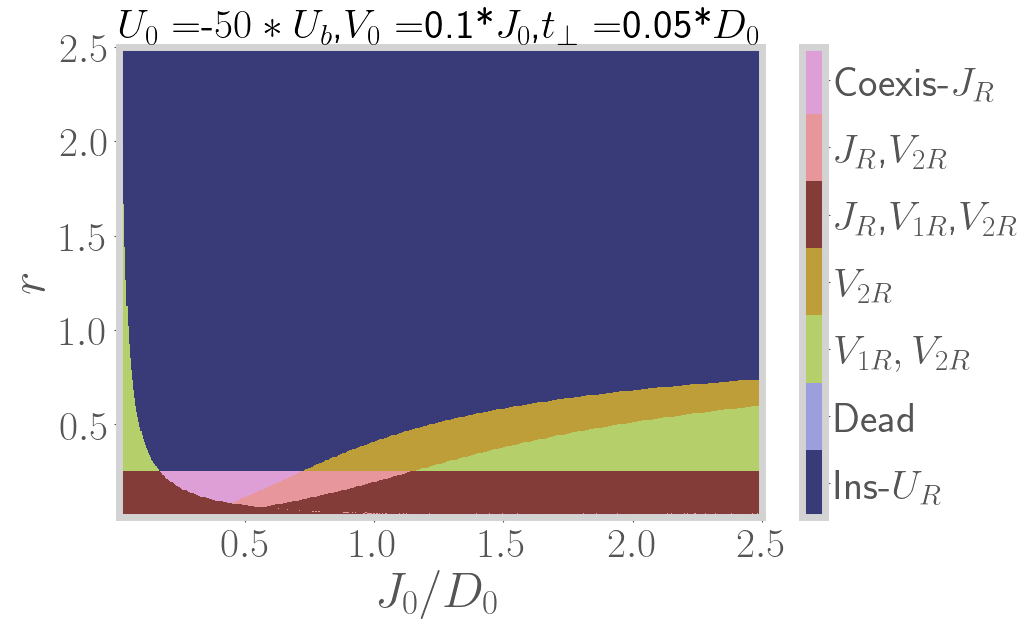

In [20]:

##### With two U_b,two J,two V when omega is fixed





import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.style.use('ggplot')
cols = [p['color'] for p in plt.rcParams['axes.prop_cycle']]
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{braket}\usepackage{nicefrac}')
plt.rcParams.update({'font.size': 30,
                     'figure.figsize': (11,7),
                     'axes.facecolor': 'white',
                     'axes.edgecolor': 'lightgray',
                     "figure.autolayout": 'True',
                     'axes.xmargin': 0.03,
                     'axes.ymargin': 0.05,
                     'axes.grid': False,
                     'axes.linewidth': 5,
                     'lines.markersize': 10,
                     'text.usetex': True,
                     'lines.linewidth': 8,
                     "legend.frameon": True,
                     "legend.framealpha": 0.7,
                     "legend.handletextpad": 1,
                     "legend.edgecolor": "gray",
                     "legend.handlelength": 1,
                     "legend.labelspacing": 0,
                     "legend.columnspacing": 1,
                     "legend.fontsize": 35,
                    })
linestyles = ["-", "--", ":"]






from time import sleep
import numpy as np
import matplotlib.pyplot as plt
import sys
from matplotlib import colors
from multiprocessing import Pool
from tqdm import tqdm


def RG_flow(J0,U0,D0,t,V10,V20,U_b,d):
    J = [J0]
    V1 = [V10]
    V2 = [V20]
    U = [U0]
    D = [D0]
    d_0_int = U[0]/4 + D[0]/2-(J[0]/4) - (U_b/4)
    d_0_int1 = d_0_int - (U[0]/2)
    d_0_int2  = d_0_int + (J[0]/4) + (U[0]/2)
    d_0_int3  = d_0_int + (J[0]/4)
    flag_J = True
    flag_V1 = True
    flag_V2 = True
    flag_U = True
    dens = []
    A1 = 0
    A2 = 0
    B1 = 0
    B2 = 0
    C1 = 0
    C2 = 0
    D1 = 0
    D2 = 0
    # print (J0,U_b,"---")
    while D[-1] > d:
        d_0=U[0]/4 + D[-1]/2-(J[-1]/4)  - (U_b/4)
        
        A1 = 1/(d_0 - t) if (d_0 - t) * (d_0_int - t) > 0 else 0
        A2 = 1/(d_0 + t) if (d_0 + t) * (d_0_int + t) > 0 else 0
         
        B1 = 1/(d_0 - (U[-1]/2) - t) if (d_0 - (U[-1]/2) - t) * (d_0_int1 - t)  > 0 else 0
        B2 = 1/(d_0 - (U[-1]/2) + t) if (d_0 - (U[-1]/2) + t) * (d_0_int1 + t)  > 0 else 0
        
        C1 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) - t ) if (d_0 + (J[-1]/4) + (U[-1]/2) - t) * (d_0_int2 - t) > 0 else 0
        C2 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) + t ) if (d_0 + (J[-1]/4) + (U[-1]/2) + t) * (d_0_int2 + t) > 0 else 0
        
        D1 = 1/(d_0 + (J[-1]/4) - t ) if (d_0 + (J[-1]/4) - t) * (d_0_int3 - t) > 0 else 0
        D2 = 1/(d_0 + (J[-1]/4) + t ) if (d_0 + (J[-1]/4) + t) * (d_0_int3 + t) > 0 else 0
            
        delta_J = J[-1]*(J[-1] + 4*U_b)*(A1 + A2)*0.5*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        
        if (J[-1] + delta_J) * J[-1] > 0 and flag_J:
            J.append(J[-1] + delta_J)
        else :
            flag_J =False
            J.append(0)
            
        delta_V_1_1 = ((3*J[-1]*V1[-1])/8)*(A2 + B2)*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        delta_V_1 =  delta_V_1_1 
        
            
        if (V1[-1] + delta_V_1) * V1[-1] > 0 and flag_V1:
            V1.append(min(V1[-1] + delta_V_1,10**120))
        else :
            V1.append(0)
            flag_V1 = False
        #print(A2,B2,V1[-1])
        delta_V_2_1 = ((3*J[-1]*V2[-1])/8)*(A1 + B1)*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        delta_V_2 =  delta_V_2_1 
        
        if (V2[-1] + delta_V_2) * V2[-1] > 0 and flag_V2:
            V2.append(min(V2[-1] + delta_V_2,10**120))
        else :
            V2.append(0)
            flag_V2 = False
            
            
        delta_U = (4*(V1[-1]**2 + V2[-1]**2)*(C1 + C2 - B1 - B2)+ J[-1]**2*(A1 + A2))* d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        
    
        if (U[-1] + delta_U) * U[-1] > 0 and flag_U:
            U.append(U[-1] + delta_U)
        else :
            U.append(0)
            flag_U = False
        D.append(D[-1]-d)
        
    return V1, V2, J, U, D
    
def RG(y,r,D0,t,V_by_J,d=0.01):
    W = []
    
    for r_i in tqdm(r):
        W.append([])
        for J0 in y :
            V10 = J0*V_by_J
            V20 = J0*V_by_J
            U_b = r_i * J0
            U0 = -50 * U_b
            V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
            
            if J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 > 0.3:
                flag = 0
            elif J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 < 0.3:
                #print (J0, V10, V20, U0, U_b, J[-1]/J0, V1[-1]/V10, V2[-1]/V20, U[-1]/U0)
                flag = 1
            elif J[-1]/J0 < 1  and V1[-1]/V10 > 1  and V2[-1]/V20 > 1:
                flag = 2
            elif J[-1]/J0 < 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 3
            elif J[-1]/J0 > 1  and V1[-1]/V10 > 1 and V2[-1]/V20 > 1:
                flag = 4
            elif J[-1]/J0 > 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 5
            elif J[-1]/J0 > 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1:
                flag = 6
            W[-1].append(flag)
            
    
    
    
    cmap = plt.cm.tab20b
    norm = colors.BoundaryNorm(np.arange(-0.5, 7, 1), cmap.N)
    im1 = plt.imshow(W, origin='lower', cmap=cmap, norm=norm, aspect = "auto",extent=(min(y)/D0, max(y)/D0, min(abs(r)), max(abs(r))),interpolation="None")
    colorbar = plt.colorbar(ticks=np.linspace(0, 6, 7))
    colorbar.set_ticklabels(['Ins-$U_R$', 'Dead','$V_{1R},V_{2R}$','$V_{2R}$','$J_{R}$,$V_{1R}$,$V_{2R}$', '$J_{R}$,$V_{2R}$','Coexis-$J_R$'])
    plt.ylabel('$r$')
    plt.xlabel('$J_{0}/D_0$')
    plt.title(r'$U_0$ =-$50 * U_b$,$V_0$ ={V_by_J}*$J_0$,$t_\perp$ ={t}*$D_0$'.format(V_by_J =V_by_J,t =t/D0),fontsize='medium')
    #plt.yscale('log')
    plt.savefig("Sr-U_0 =-U_b,V_0 ={V_by_J}*J0,t*D0 ={t}.pdf".format(V_by_J =V_by_J,t =t), bbox_inches='tight')
    plt.savefig("Sr-U_0 =-U_b,V_0 ={V_by_J}*J0,t*D0 ={t}.png".format(V_by_J =V_by_J,t =t), bbox_inches='tight')
    plt.show()

D0 = 1
#U0 = 0.1 * D0
#y = 10**np.linspace(-1,0, 40) * D0
y = np.linspace(0.01, 2.5, 600) * D0
#print(y)
#x = np.linspace(0.001, 2, 10) * D0
V_by_J = 0.1
#r = -10**np.linspace(-1,1, 40) 
r = -np.linspace(0.01,2.5,600) 
t = 0.05 * D0
RG(y,r,D0,t,V_by_J,d=0.0001)

100%|█████████████████████████████████████| 600/600 [17:15:04<00:00, 103.51s/it]


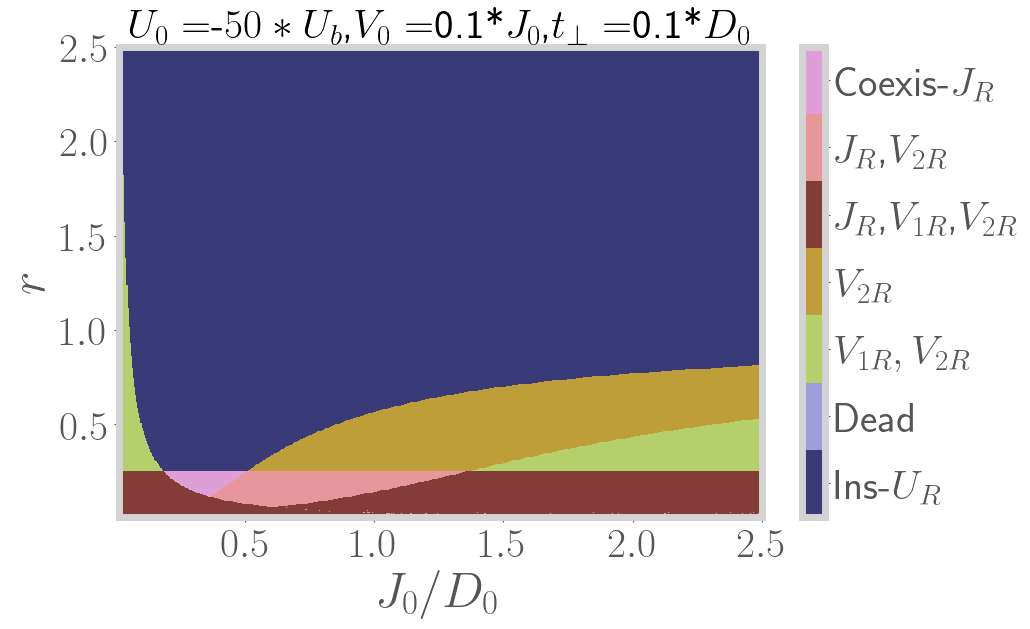

In [16]:

##### With two U_b,two J,two V when omega is fixed





import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.style.use('ggplot')
cols = [p['color'] for p in plt.rcParams['axes.prop_cycle']]
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{braket}\usepackage{nicefrac}')
plt.rcParams.update({'font.size': 30,
                     'figure.figsize': (11,7),
                     'axes.facecolor': 'white',
                     'axes.edgecolor': 'lightgray',
                     "figure.autolayout": 'True',
                     'axes.xmargin': 0.03,
                     'axes.ymargin': 0.05,
                     'axes.grid': False,
                     'axes.linewidth': 5,
                     'lines.markersize': 10,
                     'text.usetex': True,
                     'lines.linewidth': 8,
                     "legend.frameon": True,
                     "legend.framealpha": 0.7,
                     "legend.handletextpad": 1,
                     "legend.edgecolor": "gray",
                     "legend.handlelength": 1,
                     "legend.labelspacing": 0,
                     "legend.columnspacing": 1,
                     "legend.fontsize": 35,
                    })
linestyles = ["-", "--", ":"]






from time import sleep
import numpy as np
import matplotlib.pyplot as plt
import sys
from matplotlib import colors
from multiprocessing import Pool
from tqdm import tqdm


def RG_flow(J0,U0,D0,t,V10,V20,U_b,d):
    J = [J0]
    V1 = [V10]
    V2 = [V20]
    U = [U0]
    D = [D0]
    d_0_int = U[0]/4 + D[0]/2-(J[0]/4) - (U_b/4)
    d_0_int1 = d_0_int - (U[0]/2)
    d_0_int2  = d_0_int + (J[0]/4) + (U[0]/2)
    d_0_int3  = d_0_int + (J[0]/4)
    flag_J = True
    flag_V1 = True
    flag_V2 = True
    flag_U = True
    dens = []
    A1 = 0
    A2 = 0
    B1 = 0
    B2 = 0
    C1 = 0
    C2 = 0
    D1 = 0
    D2 = 0
    # print (J0,U_b,"---")
    while D[-1] > d:
        d_0=U[0]/4 + D[-1]/2-(J[-1]/4)  - (U_b/4)
        
        A1 = 1/(d_0 - t) if (d_0 - t) * (d_0_int - t) > 0 else 0
        A2 = 1/(d_0 + t) if (d_0 + t) * (d_0_int + t) > 0 else 0
         
        B1 = 1/(d_0 - (U[-1]/2) - t) if (d_0 - (U[-1]/2) - t) * (d_0_int1 - t)  > 0 else 0
        B2 = 1/(d_0 - (U[-1]/2) + t) if (d_0 - (U[-1]/2) + t) * (d_0_int1 + t)  > 0 else 0
        
        C1 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) - t ) if (d_0 + (J[-1]/4) + (U[-1]/2) - t) * (d_0_int2 - t) > 0 else 0
        C2 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) + t ) if (d_0 + (J[-1]/4) + (U[-1]/2) + t) * (d_0_int2 + t) > 0 else 0
        
        D1 = 1/(d_0 + (J[-1]/4) - t ) if (d_0 + (J[-1]/4) - t) * (d_0_int3 - t) > 0 else 0
        D2 = 1/(d_0 + (J[-1]/4) + t ) if (d_0 + (J[-1]/4) + t) * (d_0_int3 + t) > 0 else 0
            
        delta_J = J[-1]*(J[-1] + 4*U_b)*(A1 + A2)*0.5*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        
        if (J[-1] + delta_J) * J[-1] > 0 and flag_J:
            J.append(J[-1] + delta_J)
        else :
            flag_J =False
            J.append(0)
            
        delta_V_1_1 = ((3*J[-1]*V1[-1])/8)*(A2 + B2)*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        delta_V_1 =  delta_V_1_1 
        
            
        if (V1[-1] + delta_V_1) * V1[-1] > 0 and flag_V1:
            V1.append(min(V1[-1] + delta_V_1,10**120))
        else :
            V1.append(0)
            flag_V1 = False
        #print(A2,B2,V1[-1])
        delta_V_2_1 = ((3*J[-1]*V2[-1])/8)*(A1 + B1)*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        delta_V_2 =  delta_V_2_1 
        
        if (V2[-1] + delta_V_2) * V2[-1] > 0 and flag_V2:
            V2.append(min(V2[-1] + delta_V_2,10**120))
        else :
            V2.append(0)
            flag_V2 = False
            
            
        delta_U = (4*(V1[-1]**2 + V2[-1]**2)*(C1 + C2 - B1 - B2)+ J[-1]**2*(A1 + A2))* d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        
    
        if (U[-1] + delta_U) * U[-1] > 0 and flag_U:
            U.append(U[-1] + delta_U)
        else :
            U.append(0)
            flag_U = False
        D.append(D[-1]-d)
        
    return V1, V2, J, U, D
    
def RG(y,r,D0,t,V_by_J,d=0.01):
    W = []
    
    for r_i in tqdm(r):
        W.append([])
        for J0 in y :
            V10 = J0*V_by_J
            V20 = J0*V_by_J
            U_b = r_i * J0
            U0 = -50 * U_b
            V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
            
            if J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 > 0.3:
                flag = 0
            elif J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 < 0.3:
                #print (J0, V10, V20, U0, U_b, J[-1]/J0, V1[-1]/V10, V2[-1]/V20, U[-1]/U0)
                flag = 1
            elif J[-1]/J0 < 1  and V1[-1]/V10 > 1  and V2[-1]/V20 > 1:
                flag = 2
            elif J[-1]/J0 < 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 3
            elif J[-1]/J0 > 1  and V1[-1]/V10 > 1 and V2[-1]/V20 > 1:
                flag = 4
            elif J[-1]/J0 > 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 5
            elif J[-1]/J0 > 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1:
                flag = 6
            W[-1].append(flag)
            
    
    
    
    cmap = plt.cm.tab20b
    norm = colors.BoundaryNorm(np.arange(-0.5, 7, 1), cmap.N)
    im1 = plt.imshow(W, origin='lower', cmap=cmap, norm=norm, aspect = "auto",extent=(min(y)/D0, max(y)/D0, min(abs(r)), max(abs(r))),interpolation="None")
    colorbar = plt.colorbar(ticks=np.linspace(0, 6, 7))
    colorbar.set_ticklabels(['Ins-$U_R$', 'Dead','$V_{1R},V_{2R}$','$V_{2R}$','$J_{R}$,$V_{1R}$,$V_{2R}$', '$J_{R}$,$V_{2R}$','Coexis-$J_R$'])
    plt.ylabel('$r$')
    plt.xlabel('$J_{0}/D_0$')
    plt.title(r'$U_0$ =-$50 * U_b$,$V_0$ ={V_by_J}*$J_0$,$t_\perp$ ={t}*$D_0$'.format(V_by_J =V_by_J,t =t/D0),fontsize='medium')
    #plt.yscale('log')
    plt.savefig("Sr-U_0 =-U_b,V_0 ={V_by_J}*J0,t*D0 ={t}.pdf".format(V_by_J =V_by_J,t =t), bbox_inches='tight')
    plt.savefig("Sr-U_0 =-U_b,V_0 ={V_by_J}*J0,t*D0 ={t}.png".format(V_by_J =V_by_J,t =t), bbox_inches='tight')
    plt.show()

D0 = 1
#U0 = 0.1 * D0
#y = 10**np.linspace(-1,0, 40) * D0
y = np.linspace(0.01, 2.5, 600) * D0
#print(y)
#x = np.linspace(0.001, 2, 10) * D0
V_by_J = 0.1
#r = -10**np.linspace(-1,1, 40) 
r = -np.linspace(0.01,2.5,600) 
t = 0.1 * D0
RG(y,r,D0,t,V_by_J,d=0.0001)

100%|█████████████████████████████████████| 600/600 [17:12:45<00:00, 103.28s/it]


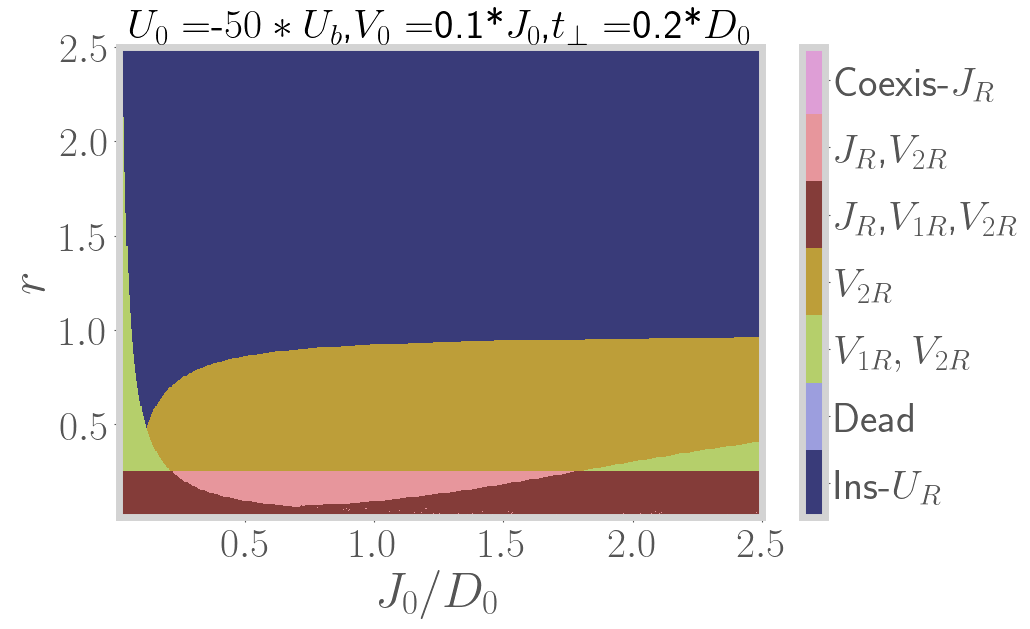

In [17]:

##### With two U_b,two J,two V when omega is fixed





import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.style.use('ggplot')
cols = [p['color'] for p in plt.rcParams['axes.prop_cycle']]
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{braket}\usepackage{nicefrac}')
plt.rcParams.update({'font.size': 30,
                     'figure.figsize': (11,7),
                     'axes.facecolor': 'white',
                     'axes.edgecolor': 'lightgray',
                     "figure.autolayout": 'True',
                     'axes.xmargin': 0.03,
                     'axes.ymargin': 0.05,
                     'axes.grid': False,
                     'axes.linewidth': 5,
                     'lines.markersize': 10,
                     'text.usetex': True,
                     'lines.linewidth': 8,
                     "legend.frameon": True,
                     "legend.framealpha": 0.7,
                     "legend.handletextpad": 1,
                     "legend.edgecolor": "gray",
                     "legend.handlelength": 1,
                     "legend.labelspacing": 0,
                     "legend.columnspacing": 1,
                     "legend.fontsize": 35,
                    })
linestyles = ["-", "--", ":"]






from time import sleep
import numpy as np
import matplotlib.pyplot as plt
import sys
from matplotlib import colors
from multiprocessing import Pool
from tqdm import tqdm


def RG_flow(J0,U0,D0,t,V10,V20,U_b,d):
    J = [J0]
    V1 = [V10]
    V2 = [V20]
    U = [U0]
    D = [D0]
    d_0_int = U[0]/4 + D[0]/2-(J[0]/4) - (U_b/4)
    d_0_int1 = d_0_int - (U[0]/2)
    d_0_int2  = d_0_int + (J[0]/4) + (U[0]/2)
    d_0_int3  = d_0_int + (J[0]/4)
    flag_J = True
    flag_V1 = True
    flag_V2 = True
    flag_U = True
    dens = []
    A1 = 0
    A2 = 0
    B1 = 0
    B2 = 0
    C1 = 0
    C2 = 0
    D1 = 0
    D2 = 0
    # print (J0,U_b,"---")
    while D[-1] > d:
        d_0=U[0]/4 + D[-1]/2-(J[-1]/4)  - (U_b/4)
        
        A1 = 1/(d_0 - t) if (d_0 - t) * (d_0_int - t) > 0 else 0
        A2 = 1/(d_0 + t) if (d_0 + t) * (d_0_int + t) > 0 else 0
         
        B1 = 1/(d_0 - (U[-1]/2) - t) if (d_0 - (U[-1]/2) - t) * (d_0_int1 - t)  > 0 else 0
        B2 = 1/(d_0 - (U[-1]/2) + t) if (d_0 - (U[-1]/2) + t) * (d_0_int1 + t)  > 0 else 0
        
        C1 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) - t ) if (d_0 + (J[-1]/4) + (U[-1]/2) - t) * (d_0_int2 - t) > 0 else 0
        C2 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) + t ) if (d_0 + (J[-1]/4) + (U[-1]/2) + t) * (d_0_int2 + t) > 0 else 0
        
        D1 = 1/(d_0 + (J[-1]/4) - t ) if (d_0 + (J[-1]/4) - t) * (d_0_int3 - t) > 0 else 0
        D2 = 1/(d_0 + (J[-1]/4) + t ) if (d_0 + (J[-1]/4) + t) * (d_0_int3 + t) > 0 else 0
            
        delta_J = J[-1]*(J[-1] + 4*U_b)*(A1 + A2)*0.5*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        
        if (J[-1] + delta_J) * J[-1] > 0 and flag_J:
            J.append(J[-1] + delta_J)
        else :
            flag_J =False
            J.append(0)
            
        delta_V_1_1 = ((3*J[-1]*V1[-1])/8)*(A2 + B2)*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        delta_V_1 =  delta_V_1_1 
        
            
        if (V1[-1] + delta_V_1) * V1[-1] > 0 and flag_V1:
            V1.append(min(V1[-1] + delta_V_1,10**120))
        else :
            V1.append(0)
            flag_V1 = False
        #print(A2,B2,V1[-1])
        delta_V_2_1 = ((3*J[-1]*V2[-1])/8)*(A1 + B1)*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        delta_V_2 =  delta_V_2_1 
        
        if (V2[-1] + delta_V_2) * V2[-1] > 0 and flag_V2:
            V2.append(min(V2[-1] + delta_V_2,10**120))
        else :
            V2.append(0)
            flag_V2 = False
            
            
        delta_U = (4*(V1[-1]**2 + V2[-1]**2)*(C1 + C2 - B1 - B2)+ J[-1]**2*(A1 + A2))* d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        
    
        if (U[-1] + delta_U) * U[-1] > 0 and flag_U:
            U.append(U[-1] + delta_U)
        else :
            U.append(0)
            flag_U = False
        D.append(D[-1]-d)
        
    return V1, V2, J, U, D
    
def RG(y,r,D0,t,V_by_J,d=0.01):
    W = []
    
    for r_i in tqdm(r):
        W.append([])
        for J0 in y :
            V10 = J0*V_by_J
            V20 = J0*V_by_J
            U_b = r_i * J0
            U0 = -50 * U_b
            V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
            
            if J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 > 0.3:
                flag = 0
            elif J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 < 0.3:
                #print (J0, V10, V20, U0, U_b, J[-1]/J0, V1[-1]/V10, V2[-1]/V20, U[-1]/U0)
                flag = 1
            elif J[-1]/J0 < 1  and V1[-1]/V10 > 1  and V2[-1]/V20 > 1:
                flag = 2
            elif J[-1]/J0 < 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 3
            elif J[-1]/J0 > 1  and V1[-1]/V10 > 1 and V2[-1]/V20 > 1:
                flag = 4
            elif J[-1]/J0 > 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 5
            elif J[-1]/J0 > 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1:
                flag = 6
            W[-1].append(flag)
            
    
    
    
    cmap = plt.cm.tab20b
    norm = colors.BoundaryNorm(np.arange(-0.5, 7, 1), cmap.N)
    im1 = plt.imshow(W, origin='lower', cmap=cmap, norm=norm, aspect = "auto",extent=(min(y)/D0, max(y)/D0, min(abs(r)), max(abs(r))),interpolation="None")
    colorbar = plt.colorbar(ticks=np.linspace(0, 6, 7))
    colorbar.set_ticklabels(['Ins-$U_R$', 'Dead','$V_{1R},V_{2R}$','$V_{2R}$','$J_{R}$,$V_{1R}$,$V_{2R}$', '$J_{R}$,$V_{2R}$','Coexis-$J_R$'])
    plt.ylabel('$r$')
    plt.xlabel('$J_{0}/D_0$')
    plt.title(r'$U_0$ =-$50 * U_b$,$V_0$ ={V_by_J}*$J_0$,$t_\perp$ ={t}*$D_0$'.format(V_by_J =V_by_J,t =t/D0),fontsize='medium')
    #plt.yscale('log')
    plt.savefig("Sr-U_0 =-U_b,V_0 ={V_by_J}*J0,t*D0 ={t}.pdf".format(V_by_J =V_by_J,t =t), bbox_inches='tight')
    plt.savefig("Sr-U_0 =-U_b,V_0 ={V_by_J}*J0,t*D0 ={t}.png".format(V_by_J =V_by_J,t =t), bbox_inches='tight')
    plt.show()

D0 = 1
#U0 = 0.1 * D0
#y = 10**np.linspace(-1,0, 40) * D0
y = np.linspace(0.01, 2.5, 600) * D0
#print(y)
#x = np.linspace(0.001, 2, 10) * D0
V_by_J = 0.1
#r = -10**np.linspace(-1,1, 40) 
r = -np.linspace(0.01,2.5,600) 
t = 0.2 * D0
RG(y,r,D0,t,V_by_J,d=0.0001)

100%|█████████████████████████████████████| 600/600 [17:16:32<00:00, 103.65s/it]


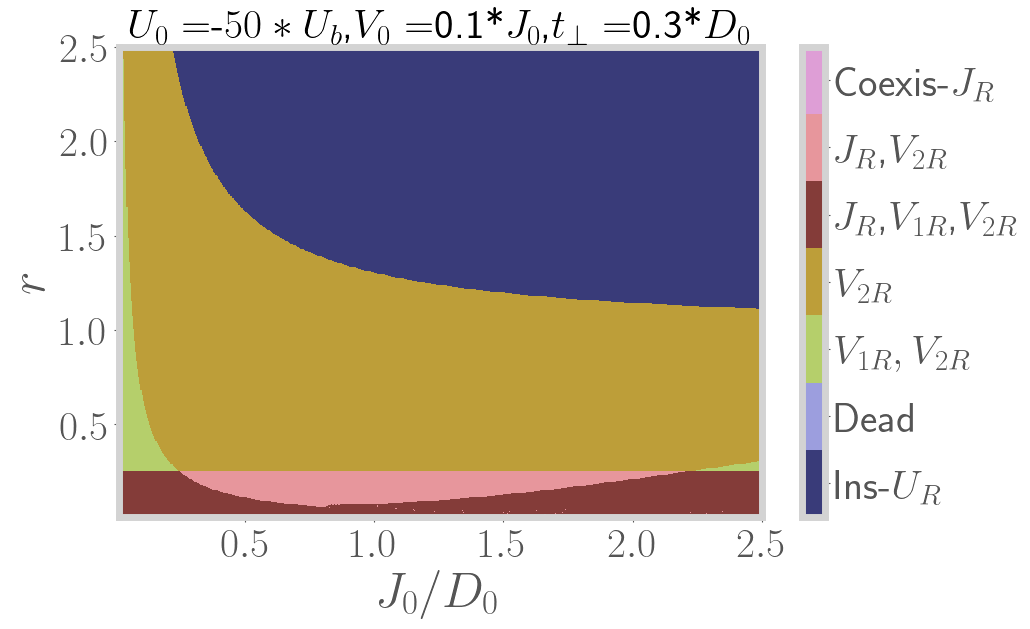

In [18]:

##### With two U_b,two J,two V when omega is fixed





import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.style.use('ggplot')
cols = [p['color'] for p in plt.rcParams['axes.prop_cycle']]
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{braket}\usepackage{nicefrac}')
plt.rcParams.update({'font.size': 30,
                     'figure.figsize': (11,7),
                     'axes.facecolor': 'white',
                     'axes.edgecolor': 'lightgray',
                     "figure.autolayout": 'True',
                     'axes.xmargin': 0.03,
                     'axes.ymargin': 0.05,
                     'axes.grid': False,
                     'axes.linewidth': 5,
                     'lines.markersize': 10,
                     'text.usetex': True,
                     'lines.linewidth': 8,
                     "legend.frameon": True,
                     "legend.framealpha": 0.7,
                     "legend.handletextpad": 1,
                     "legend.edgecolor": "gray",
                     "legend.handlelength": 1,
                     "legend.labelspacing": 0,
                     "legend.columnspacing": 1,
                     "legend.fontsize": 35,
                    })
linestyles = ["-", "--", ":"]






from time import sleep
import numpy as np
import matplotlib.pyplot as plt
import sys
from matplotlib import colors
from multiprocessing import Pool
from tqdm import tqdm


def RG_flow(J0,U0,D0,t,V10,V20,U_b,d):
    J = [J0]
    V1 = [V10]
    V2 = [V20]
    U = [U0]
    D = [D0]
    d_0_int = U[0]/4 + D[0]/2-(J[0]/4) - (U_b/4)
    d_0_int1 = d_0_int - (U[0]/2)
    d_0_int2  = d_0_int + (J[0]/4) + (U[0]/2)
    d_0_int3  = d_0_int + (J[0]/4)
    flag_J = True
    flag_V1 = True
    flag_V2 = True
    flag_U = True
    dens = []
    A1 = 0
    A2 = 0
    B1 = 0
    B2 = 0
    C1 = 0
    C2 = 0
    D1 = 0
    D2 = 0
    # print (J0,U_b,"---")
    while D[-1] > d:
        d_0=U[0]/4 + D[-1]/2-(J[-1]/4)  - (U_b/4)
        
        A1 = 1/(d_0 - t) if (d_0 - t) * (d_0_int - t) > 0 else 0
        A2 = 1/(d_0 + t) if (d_0 + t) * (d_0_int + t) > 0 else 0
         
        B1 = 1/(d_0 - (U[-1]/2) - t) if (d_0 - (U[-1]/2) - t) * (d_0_int1 - t)  > 0 else 0
        B2 = 1/(d_0 - (U[-1]/2) + t) if (d_0 - (U[-1]/2) + t) * (d_0_int1 + t)  > 0 else 0
        
        C1 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) - t ) if (d_0 + (J[-1]/4) + (U[-1]/2) - t) * (d_0_int2 - t) > 0 else 0
        C2 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) + t ) if (d_0 + (J[-1]/4) + (U[-1]/2) + t) * (d_0_int2 + t) > 0 else 0
        
        D1 = 1/(d_0 + (J[-1]/4) - t ) if (d_0 + (J[-1]/4) - t) * (d_0_int3 - t) > 0 else 0
        D2 = 1/(d_0 + (J[-1]/4) + t ) if (d_0 + (J[-1]/4) + t) * (d_0_int3 + t) > 0 else 0
            
        delta_J = J[-1]*(J[-1] + 4*U_b)*(A1 + A2)*0.5*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        
        if (J[-1] + delta_J) * J[-1] > 0 and flag_J:
            J.append(J[-1] + delta_J)
        else :
            flag_J =False
            J.append(0)
            
        delta_V_1_1 = ((3*J[-1]*V1[-1])/8)*(A2 + B2)*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        delta_V_1 =  delta_V_1_1 
        
            
        if (V1[-1] + delta_V_1) * V1[-1] > 0 and flag_V1:
            V1.append(min(V1[-1] + delta_V_1,10**120))
        else :
            V1.append(0)
            flag_V1 = False
        #print(A2,B2,V1[-1])
        delta_V_2_1 = ((3*J[-1]*V2[-1])/8)*(A1 + B1)*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        delta_V_2 =  delta_V_2_1 
        
        if (V2[-1] + delta_V_2) * V2[-1] > 0 and flag_V2:
            V2.append(min(V2[-1] + delta_V_2,10**120))
        else :
            V2.append(0)
            flag_V2 = False
            
            
        delta_U = (4*(V1[-1]**2 + V2[-1]**2)*(C1 + C2 - B1 - B2)+ J[-1]**2*(A1 + A2))* d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        
    
        if (U[-1] + delta_U) * U[-1] > 0 and flag_U:
            U.append(U[-1] + delta_U)
        else :
            U.append(0)
            flag_U = False
        D.append(D[-1]-d)
        
    return V1, V2, J, U, D
    
def RG(y,r,D0,t,V_by_J,d=0.01):
    W = []
    
    for r_i in tqdm(r):
        W.append([])
        for J0 in y :
            V10 = J0*V_by_J
            V20 = J0*V_by_J
            U_b = r_i * J0
            U0 = -50 * U_b
            V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
            
            if J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 > 0.3:
                flag = 0
            elif J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 < 0.3:
                #print (J0, V10, V20, U0, U_b, J[-1]/J0, V1[-1]/V10, V2[-1]/V20, U[-1]/U0)
                flag = 1
            elif J[-1]/J0 < 1  and V1[-1]/V10 > 1  and V2[-1]/V20 > 1:
                flag = 2
            elif J[-1]/J0 < 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 3
            elif J[-1]/J0 > 1  and V1[-1]/V10 > 1 and V2[-1]/V20 > 1:
                flag = 4
            elif J[-1]/J0 > 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 5
            elif J[-1]/J0 > 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1:
                flag = 6
            W[-1].append(flag)
            
    
    
    
    cmap = plt.cm.tab20b
    norm = colors.BoundaryNorm(np.arange(-0.5, 7, 1), cmap.N)
    im1 = plt.imshow(W, origin='lower', cmap=cmap, norm=norm, aspect = "auto",extent=(min(y)/D0, max(y)/D0, min(abs(r)), max(abs(r))),interpolation="None")
    colorbar = plt.colorbar(ticks=np.linspace(0, 6, 7))
    colorbar.set_ticklabels(['Ins-$U_R$', 'Dead','$V_{1R},V_{2R}$','$V_{2R}$','$J_{R}$,$V_{1R}$,$V_{2R}$', '$J_{R}$,$V_{2R}$','Coexis-$J_R$'])
    plt.ylabel('$r$')
    plt.xlabel('$J_{0}/D_0$')
    plt.title(r'$U_0$ =-$50 * U_b$,$V_0$ ={V_by_J}*$J_0$,$t_\perp$ ={t}*$D_0$'.format(V_by_J =V_by_J,t =t/D0),fontsize='medium')
    #plt.yscale('log')
    plt.savefig("Sr-U_0 =-U_b,V_0 ={V_by_J}*J0,t*D0 ={t}.pdf".format(V_by_J =V_by_J,t =t), bbox_inches='tight')
    plt.savefig("Sr-U_0 =-U_b,V_0 ={V_by_J}*J0,t*D0 ={t}.png".format(V_by_J =V_by_J,t =t), bbox_inches='tight')
    plt.show()

D0 = 1
#U0 = 0.1 * D0
#y = 10**np.linspace(-1,0, 40) * D0
y = np.linspace(0.01, 2.5, 600) * D0
#print(y)
#x = np.linspace(0.001, 2, 10) * D0
V_by_J = 0.1
#r = -10**np.linspace(-1,1, 40) 
r = -np.linspace(0.01,2.5,600) 
t = 0.3 * D0
RG(y,r,D0,t,V_by_J,d=0.0001)

100%|█████████████████████████████████████| 600/600 [17:14:36<00:00, 103.46s/it]


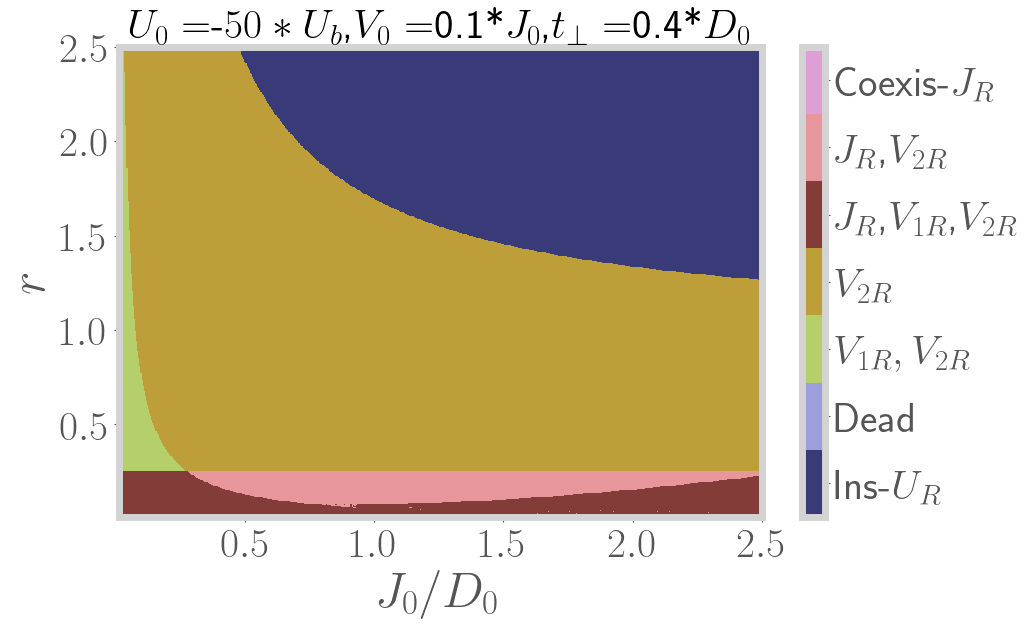

In [19]:

##### With two U_b,two J,two V when omega is fixed





import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.style.use('ggplot')
cols = [p['color'] for p in plt.rcParams['axes.prop_cycle']]
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{braket}\usepackage{nicefrac}')
plt.rcParams.update({'font.size': 30,
                     'figure.figsize': (11,7),
                     'axes.facecolor': 'white',
                     'axes.edgecolor': 'lightgray',
                     "figure.autolayout": 'True',
                     'axes.xmargin': 0.03,
                     'axes.ymargin': 0.05,
                     'axes.grid': False,
                     'axes.linewidth': 5,
                     'lines.markersize': 10,
                     'text.usetex': True,
                     'lines.linewidth': 8,
                     "legend.frameon": True,
                     "legend.framealpha": 0.7,
                     "legend.handletextpad": 1,
                     "legend.edgecolor": "gray",
                     "legend.handlelength": 1,
                     "legend.labelspacing": 0,
                     "legend.columnspacing": 1,
                     "legend.fontsize": 35,
                    })
linestyles = ["-", "--", ":"]






from time import sleep
import numpy as np
import matplotlib.pyplot as plt
import sys
from matplotlib import colors
from multiprocessing import Pool
from tqdm import tqdm


def RG_flow(J0,U0,D0,t,V10,V20,U_b,d):
    J = [J0]
    V1 = [V10]
    V2 = [V20]
    U = [U0]
    D = [D0]
    d_0_int = U[0]/4 + D[0]/2-(J[0]/4) - (U_b/4)
    d_0_int1 = d_0_int - (U[0]/2)
    d_0_int2  = d_0_int + (J[0]/4) + (U[0]/2)
    d_0_int3  = d_0_int + (J[0]/4)
    flag_J = True
    flag_V1 = True
    flag_V2 = True
    flag_U = True
    dens = []
    A1 = 0
    A2 = 0
    B1 = 0
    B2 = 0
    C1 = 0
    C2 = 0
    D1 = 0
    D2 = 0
    # print (J0,U_b,"---")
    while D[-1] > d:
        d_0=U[0]/4 + D[-1]/2-(J[-1]/4)  - (U_b/4)
        
        A1 = 1/(d_0 - t) if (d_0 - t) * (d_0_int - t) > 0 else 0
        A2 = 1/(d_0 + t) if (d_0 + t) * (d_0_int + t) > 0 else 0
         
        B1 = 1/(d_0 - (U[-1]/2) - t) if (d_0 - (U[-1]/2) - t) * (d_0_int1 - t)  > 0 else 0
        B2 = 1/(d_0 - (U[-1]/2) + t) if (d_0 - (U[-1]/2) + t) * (d_0_int1 + t)  > 0 else 0
        
        C1 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) - t ) if (d_0 + (J[-1]/4) + (U[-1]/2) - t) * (d_0_int2 - t) > 0 else 0
        C2 = 1/(d_0 + (J[-1]/4) + (U[-1]/2) + t ) if (d_0 + (J[-1]/4) + (U[-1]/2) + t) * (d_0_int2 + t) > 0 else 0
        
        D1 = 1/(d_0 + (J[-1]/4) - t ) if (d_0 + (J[-1]/4) - t) * (d_0_int3 - t) > 0 else 0
        D2 = 1/(d_0 + (J[-1]/4) + t ) if (d_0 + (J[-1]/4) + t) * (d_0_int3 + t) > 0 else 0
            
        delta_J = J[-1]*(J[-1] + 4*U_b)*(A1 + A2)*0.5*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        
        if (J[-1] + delta_J) * J[-1] > 0 and flag_J:
            J.append(J[-1] + delta_J)
        else :
            flag_J =False
            J.append(0)
            
        delta_V_1_1 = ((3*J[-1]*V1[-1])/8)*(A2 + B2)*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        delta_V_1 =  delta_V_1_1 
        
            
        if (V1[-1] + delta_V_1) * V1[-1] > 0 and flag_V1:
            V1.append(min(V1[-1] + delta_V_1,10**120))
        else :
            V1.append(0)
            flag_V1 = False
        #print(A2,B2,V1[-1])
        delta_V_2_1 = ((3*J[-1]*V2[-1])/8)*(A1 + B1)*d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        delta_V_2 =  delta_V_2_1 
        
        if (V2[-1] + delta_V_2) * V2[-1] > 0 and flag_V2:
            V2.append(min(V2[-1] + delta_V_2,10**120))
        else :
            V2.append(0)
            flag_V2 = False
            
            
        delta_U = (4*(V1[-1]**2 + V2[-1]**2)*(C1 + C2 - B1 - B2)+ J[-1]**2*(A1 + A2))* d * (2/(np.pi * D[0]))*np.sqrt(1 - (D[-1]**2/D[0]**2))
        
    
        if (U[-1] + delta_U) * U[-1] > 0 and flag_U:
            U.append(U[-1] + delta_U)
        else :
            U.append(0)
            flag_U = False
        D.append(D[-1]-d)
        
    return V1, V2, J, U, D
    
def RG(y,r,D0,t,V_by_J,d=0.01):
    W = []
    
    for r_i in tqdm(r):
        W.append([])
        for J0 in y :
            V10 = J0*V_by_J
            V20 = J0*V_by_J
            U_b = r_i * J0
            U0 = -50 * U_b
            V1, V2, J, U, D = RG_flow(J0,U0,D0,t,V10,V20,U_b,d)
            
            if J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 > 0.3:
                flag = 0
            elif J[-1]/J0 < 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1 and U[-1]/U0 < 0.3:
                #print (J0, V10, V20, U0, U_b, J[-1]/J0, V1[-1]/V10, V2[-1]/V20, U[-1]/U0)
                flag = 1
            elif J[-1]/J0 < 1  and V1[-1]/V10 > 1  and V2[-1]/V20 > 1:
                flag = 2
            elif J[-1]/J0 < 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 3
            elif J[-1]/J0 > 1  and V1[-1]/V10 > 1 and V2[-1]/V20 > 1:
                flag = 4
            elif J[-1]/J0 > 1  and V1[-1]/V10 < 1 and V2[-1]/V20 > 1:
                flag = 5
            elif J[-1]/J0 > 1 and V1[-1]/V10 < 1 and V2[-1]/V20 < 1:
                flag = 6
            W[-1].append(flag)
            
    
    
    
    cmap = plt.cm.tab20b
    norm = colors.BoundaryNorm(np.arange(-0.5, 7, 1), cmap.N)
    im1 = plt.imshow(W, origin='lower', cmap=cmap, norm=norm, aspect = "auto",extent=(min(y)/D0, max(y)/D0, min(abs(r)), max(abs(r))),interpolation="None")
    colorbar = plt.colorbar(ticks=np.linspace(0, 6, 7))
    colorbar.set_ticklabels(['Ins-$U_R$', 'Dead','$V_{1R},V_{2R}$','$V_{2R}$','$J_{R}$,$V_{1R}$,$V_{2R}$', '$J_{R}$,$V_{2R}$','Coexis-$J_R$'])
    plt.ylabel('$r$')
    plt.xlabel('$J_{0}/D_0$')
    plt.title(r'$U_0$ =-$50 * U_b$,$V_0$ ={V_by_J}*$J_0$,$t_\perp$ ={t}*$D_0$'.format(V_by_J =V_by_J,t =t/D0),fontsize='medium')
    #plt.yscale('log')
    plt.savefig("Sr-U_0 =-U_b,V_0 ={V_by_J}*J0,t*D0 ={t}.pdf".format(V_by_J =V_by_J,t =t), bbox_inches='tight')
    plt.savefig("Sr-U_0 =-U_b,V_0 ={V_by_J}*J0,t*D0 ={t}.png".format(V_by_J =V_by_J,t =t), bbox_inches='tight')
    plt.show()

D0 = 1
#U0 = 0.1 * D0
#y = 10**np.linspace(-1,0, 40) * D0
y = np.linspace(0.01, 2.5, 600) * D0
#print(y)
#x = np.linspace(0.001, 2, 10) * D0
V_by_J = 0.1
#r = -10**np.linspace(-1,1, 40) 
r = -np.linspace(0.01,2.5,600) 
t = 0.4 * D0
RG(y,r,D0,t,V_by_J,d=0.0001)